# Welcome to InsightsVisualizer, where data meets discovery!


## INTRODUCTION
In this project, I delve into two distinct datasets, "Life expectancy.csv" and "Suicide Rate.csv", to uncover hidden insights and trends. Through meticulous analysis, we aim to unravel the intricate connections between various socio-economic indicators such as life expectancy, happiness score, fertility rate, GDP per capita, and suicide rate across different countries. By merging these datasets, we construct a unified view of global socio-economic dynamics, shedding light on underlying patterns and correlations. Through a combination of insightful visualizations and advanced machine learning techniques, I endeavor to extract actionable insights and predictive models.

## Project Scope and Disclaimers
The project scope encompasses leveraging visualizations, developing new functions, and employing machine learning models to explore and extract insights from datasets. It's important to note that this project does not aim to draw definitive conclusions due to the nature of the data. While most of the data are real, certain columns, such as suicide rate, may not accurately reflect real-world statistics. However, by utilizing visualizations, creating custom functions, and employing machine learning techniques, this project seeks to uncover valuable insights and trends within the data, offering a unique perspective on various socio-economic factors across different countries.

## Summary
### Objective
The objective is to explore the correlation between life expectancy, GDP per capita, and happiness score across various countries. Additionally, the project aims to evaluate the effectiveness of machine learning models in predicting these variables.

### Methodology
The study employs two datasets: "Life expectancy.csv" and "Suicide Rate.csv," containing data on life expectancy, GDP per capita, happiness score, fertility rate, suicide rate, and country. These datasets are merged and analyzed using visualizations, custom functions, and machine learning models. Statistical methods are applied to handle missing values and identify outliers. Machine learning models are trained and evaluated to predict life expectancy, GDP per capita, and happiness score.

### Findings
- Strong correlations observed between life expectancy, GDP per capita, and happiness score, indicating    significant associations among these factors.

- Surprisingly, minimal to no discernible relationship found between other variables in the dataset and suicide rate, possibly influenced by the nature of the data.

- Machine learning models developed to predict life expectancy, GDP per capita, and happiness score demonstrate promising performance, despite the limited amount of available data.

## Datesets Overview
The dataset comprises seven key columns, each offering valuable insights into various aspects of nations' demographics and well-being:

### Life_expectancy.csv:

- Country: Contains the names of countries, providing a comprehensive list for analysis.

- life_exp_men: Represents the average life expectancy for men in different countries, offering insights into    gender-specific longevity.

- life_exp_women: Indicates the average life expectancy for women in different countries, allowing for gender-  based comparisons in longevity.

- happiness_score: Provides data on the happiness score sourced from an annual report, measured on a scale from 1 to 10, reflecting subjective well-being.

- fertility_rate: Represents the average number of births per woman in a given country, reflecting demographic trends and reproductive health.

### Suicide Rate.csv:

- gdp_per_cap: Reflects the GDP per capita across various countries, offering insights into economic prosperity and wealth distribution.

- suicide_rate: Indicates the number of suicides per 100,000 inhabitants per nation, providing data on mental health and social well-being.

This structured dataset facilitates a comprehensive exploration of the relationships between life expectancy, happiness score, fertility rate, GDP per capita, and suicide rates across different countries.

In this section of the project, we begin by importing essential libraries such as NumPy, Pandas, Missingno, Seaborn, and Matplotlib to facilitate data manipulation, visualization, and analysis. We aim to merge two distinct datasets to create a comprehensive DataFrame for further exploration. The first dataset contains crucial information on life expectancy across different countries, while the second dataset provides insights into suicide rates globally. By merging these datasets based on the common "Country" column using an inner join approach, we create a unified DataFrame named 'df', allowing us to analyze the correlation between life expectancy and suicide rates, among other variables, on a country-by-country basis.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Read the first dataset containing life expectancy data
df_1 = pd.read_csv("Life expectancy.csv")
print(df_1.columns)
# Read the second dataset containing suicide rate data
df_2 = pd.read_csv("Suicide Rate.csv")

# Merge the two datasets based on the "Country" column using an inner join
# This creates a new DataFrame 'df' containing both life expectancy and suicide rate data for each country
df = pd.merge(df_1, df_2, on="Country", how="inner")
print(df.head())


Index(['Country', 'Life Expectancy (years) - Men',
       'Life Expectancy (years) - Women', 'Happiness Score',
       'Fertility Rate (births per woman)'],
      dtype='object')
       Country  Life Expectancy (years) - Men  ...  GDP per capita  Suicide rate
0  Afghanistan                           60.6  ...           1,105          20.6
1      Albania                           74.8  ...           4,932          32.4
2      Algeria                           73.3  ...           4,534          15.6
3      Andorra                           81.7  ...          46,622          18.9
4       Angola                           58.1  ...           2,077          20.5

[5 rows x 7 columns]


In this segment, we focus on refining the dataset for clarity and optimal analysis. By changing column names to more descriptive and concise labels, such as "life_exp_men" for life expectancy of men and "happiness_score" for the happiness score, we enhance readability and ease of use. Additionally, we convert the "GDP per capita" column to a floating-point format after removing commas, preparing it for numerical analysis. After these transformations, we drop the original columns to maintain data integrity and streamline the DataFrame structure.

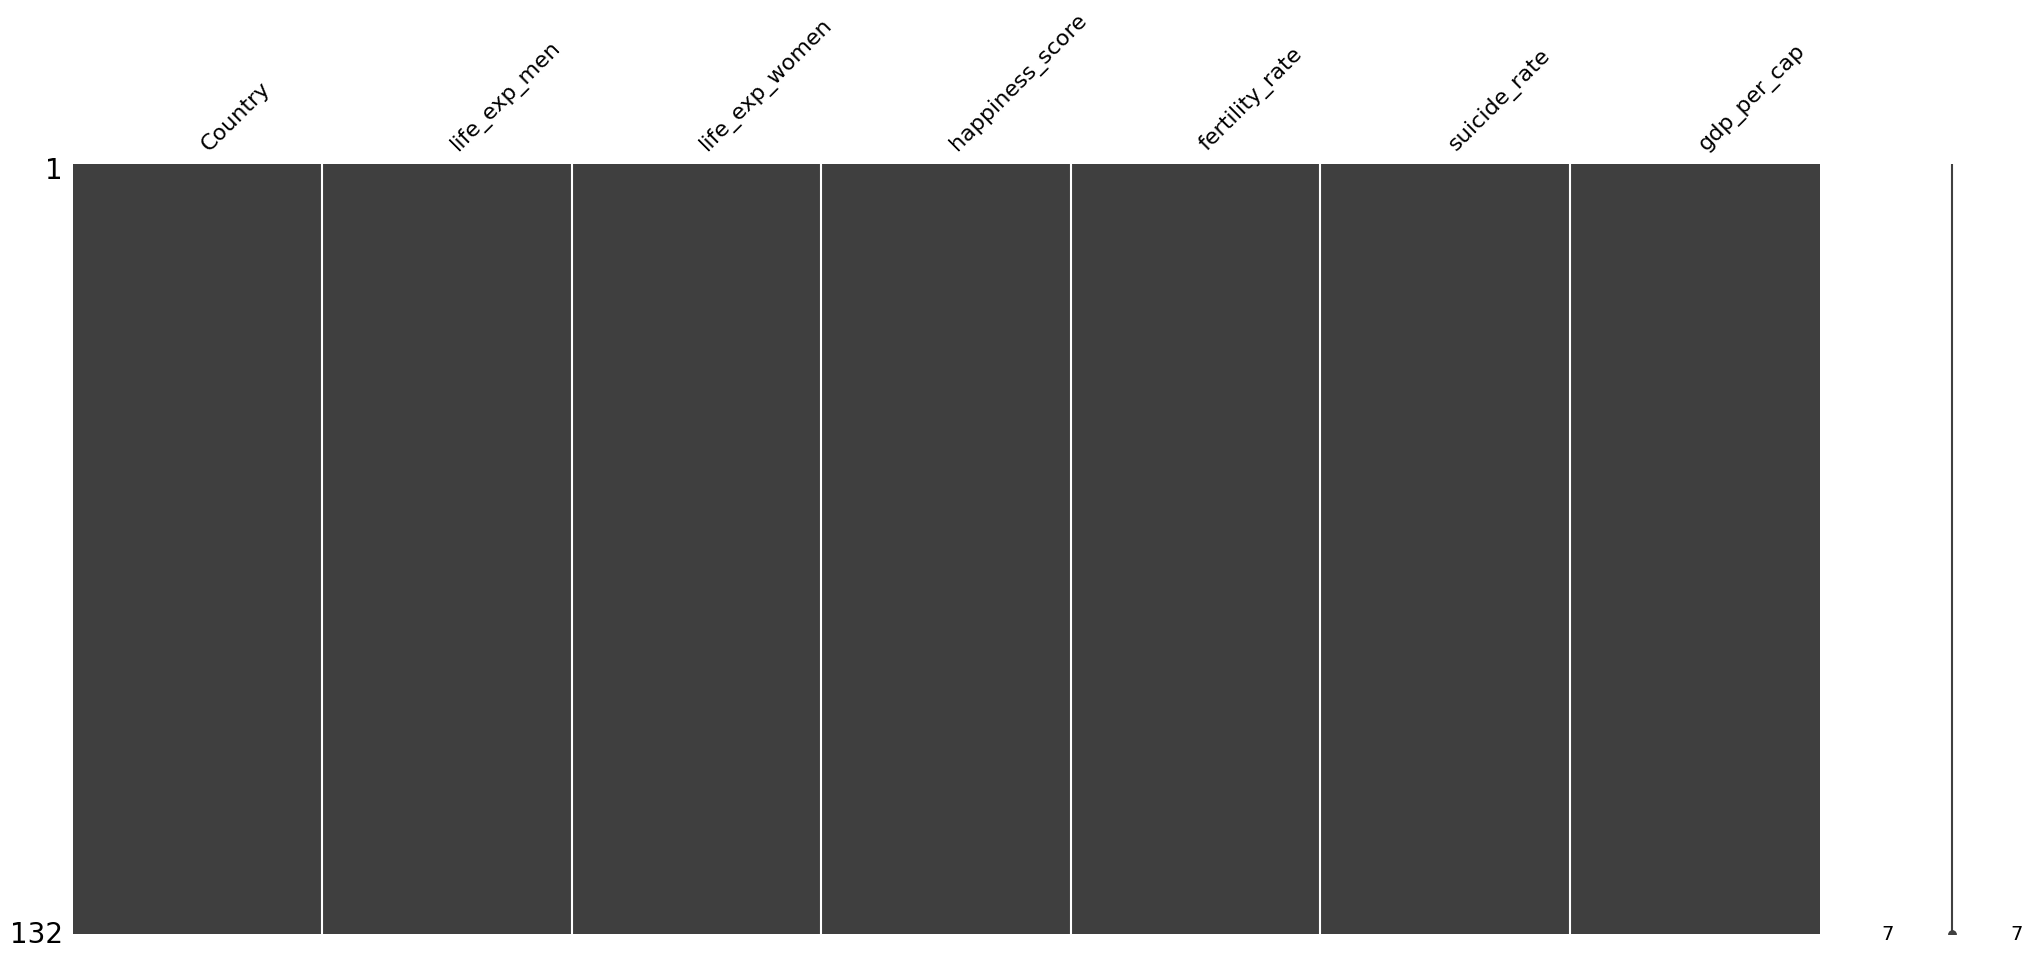

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          132 non-null    object 
 1   life_exp_men     132 non-null    float64
 2   life_exp_women   132 non-null    float64
 3   happiness_score  132 non-null    float64
 4   fertility_rate   132 non-null    float64
 5   suicide_rate     132 non-null    float64
 6   gdp_per_cap      132 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.2+ KB


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Read the first dataset containing life expectancy data
df_1 = pd.read_csv("Life expectancy.csv")

# Read the second dataset containing suicide rate data
df_2 = pd.read_csv("Suicide Rate.csv")
df_3 = pd.read_csv("world_population.csv")
# Merge the two datasets based on the "Country" column using an inner join
# This creates a new DataFrame 'df' containing both life expectancy and suicide rate data for each country
df = pd.merge(df_1, df_2, on="Country", how="inner")

# CHANGE COLUMN NAMES
# Renaming columns for clarity and ease of use
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]

# Convert "GDP per capita" column to float after replacing commas
# GDP per capita is likely formatted with commas, so we remove them and convert the column to float for numerical analysis
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")


# DROP OLD COLUMNS
# Dropping the original columns after renaming and processing them
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# MISSING VALUE
# Visualizing missing values in the DataFrame using the missingno library
msno.matrix(df)
plt.show()

# Displaying information about the DataFrame
# Provides an overview of the columns, non-null counts, and data types
df.info()

Visualization of missing values using the missingno library reveals a comprehensive view of the dataset's completeness. Notably, the absence of missing values is evident, reflecting the effectiveness of the inner join merging strategy in preserving data integrity. Lastly, an overview of the DataFrame's information provides insights into column names, non-null counts, and data types, laying the groundwork for further analysis and exploration of the dataset.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

This section delves into the detection and visualization of outliers within the dataset's key variables. Employing box plots for each variable facilitates a comprehensive view of potential outliers across diverse metrics, including life expectancy for men and women, happiness score, fertility rate, GDP per capita, and suicide rate. The exploration reveals notable instances of outliers, particularly evident in the GDP per capita column.

Outliers in life_exp_men:
Empty DataFrame
Columns: [Country, life_exp_men]
Index: []

Outliers in life_exp_women:
     Country  life_exp_women
118  Nigeria            55.6

Outliers in happiness_score:
Empty DataFrame
Columns: [Country, happiness_score]
Index: []

Outliers in fertility_rate:
     Country  fertility_rate
26   Burundi             6.1
99      Mali             6.2
117    Niger             7.6

Outliers in suicide_rate:
                    Country  suicide_rate
1                   Albania          32.4
7                   Armenia          39.7
15                  Belarus          31.4
21   Bosnia and Herzegovina          28.1
24                 Bulgaria          25.3
60                  Georgia          28.2
68                   Guyana          25.6
88                   Latvia          33.2
93                Lithuania          27.4
106                 Moldova          29.5
107                Mongolia          32.1

Outliers in gdp_per_cap:
           Country  gdp_per_cap
3 

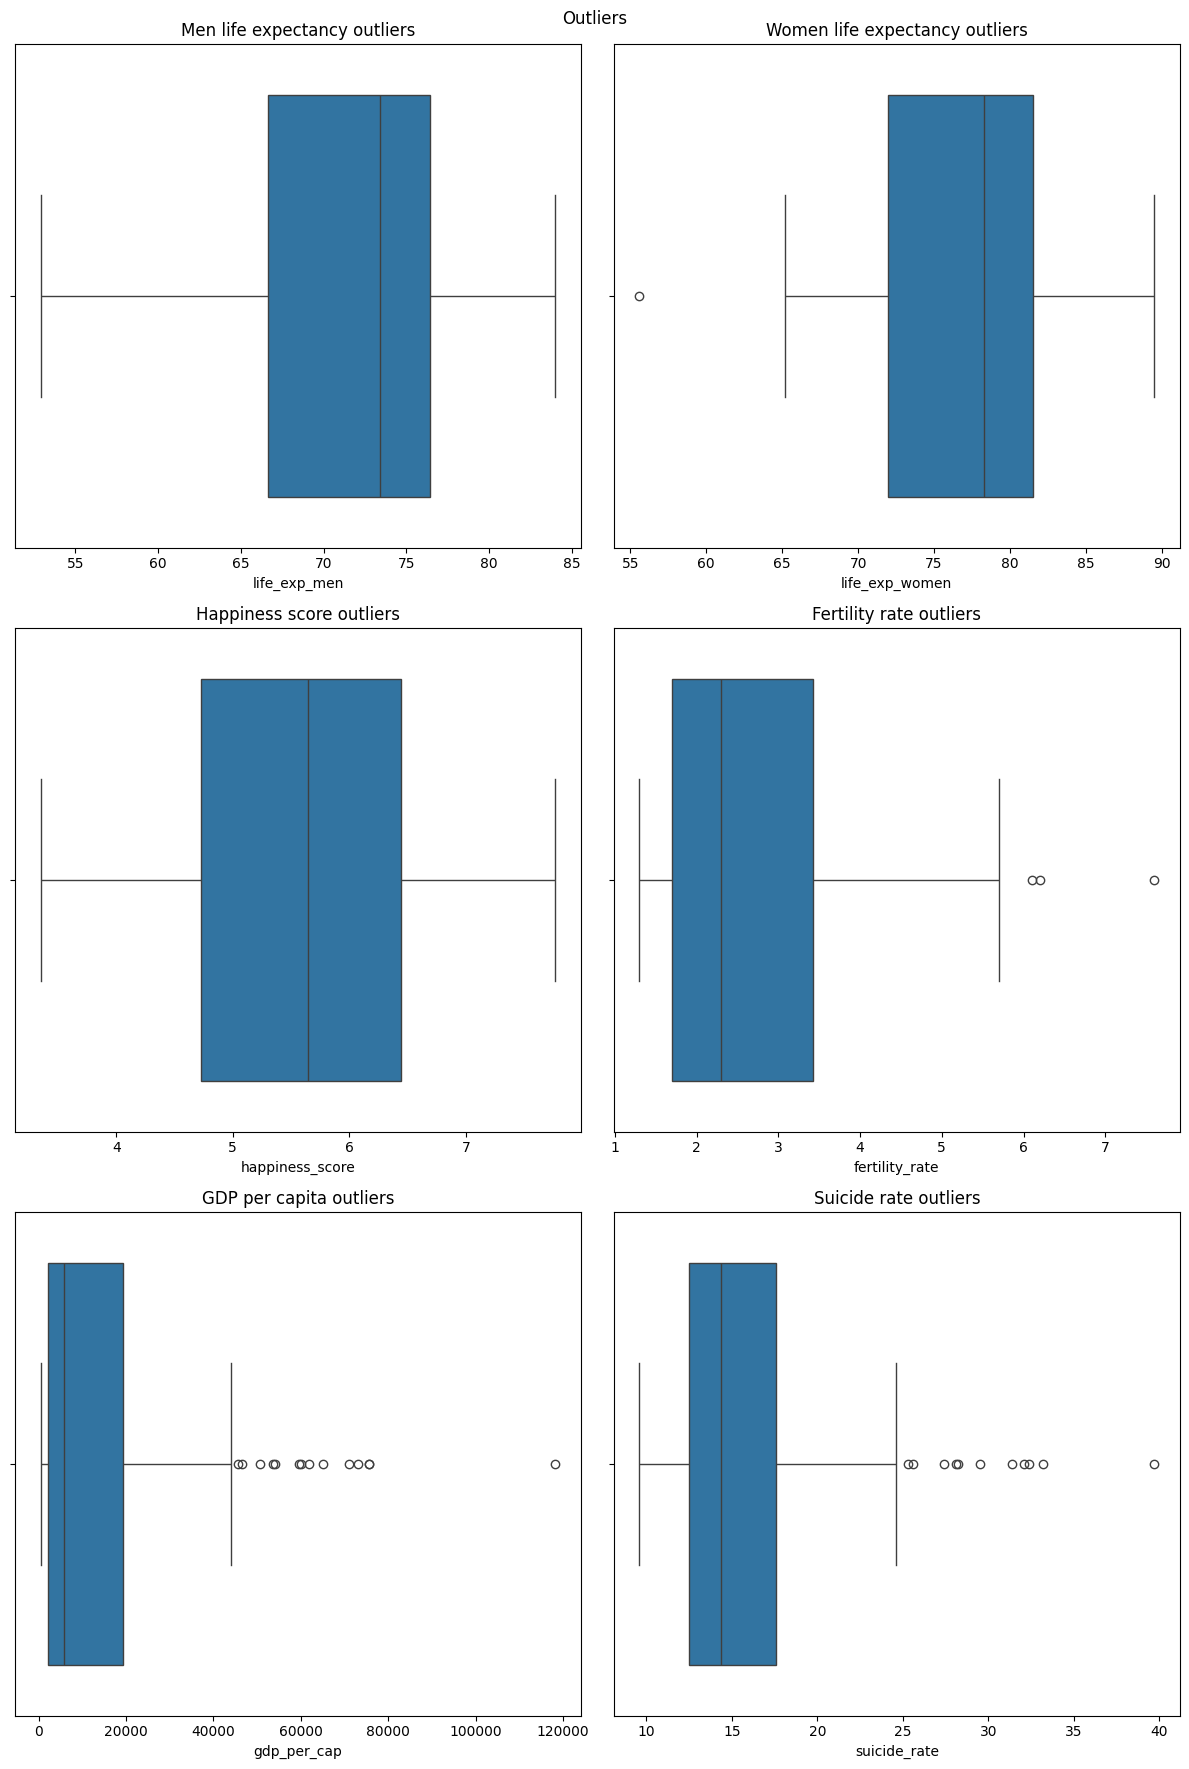

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# Create subplots for outlier visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
plt.suptitle("Outliers")

# Box plots for each variable to visualize outliers
sns.boxplot(x=df["life_exp_men"], ax=axes[0, 0])
axes[0, 0].set_title("Men life expectancy outliers")

sns.boxplot(x=df["life_exp_women"], ax=axes[0, 1])
axes[0, 1].set_title("Women life expectancy outliers")

sns.boxplot(x=df["happiness_score"], ax=axes[1, 0])
axes[1, 0].set_title("Happiness score outliers")

sns.boxplot(x=df["fertility_rate"], ax=axes[1, 1])
axes[1, 1].set_title("Fertility rate outliers")

sns.boxplot(x=df["gdp_per_cap"], ax=axes[2, 0])
axes[2, 0].set_title("GDP per capita outliers")

sns.boxplot(x=df["suicide_rate"], ax=axes[2, 1])
axes[2, 1].set_title("Suicide rate outliers")

# Adjust layout to prevent overlap
plt.tight_layout()

# Drop unnecessary columns for outlier detection
df_mod = df.drop("Country", axis=1).columns

# Initialize an empty list to store outliers
outliers = []

# Iterate over each column to detect outliers using the IQR method
for col in df_mod:
    seventy_fifth = df[col].quantile(0.75)
    twenty_fifth = df[col].quantile(0.25)
    IQR = seventy_fifth - twenty_fifth
    upper = seventy_fifth + (1.5 * IQR)
    lower = twenty_fifth - (1.5 * IQR)
    outliers.append((df[col] < lower) | (df[col] > upper))
    
columns = ["life_exp_men", "life_exp_women", "happiness_score", "fertility_rate", "suicide_rate", "gdp_per_cap"]

# Iterate over the outliers and print them for each variable
for i, col in enumerate(columns):
    print(f"Outliers in {col}:")
    print(df.loc[outliers[i], ["Country", col]])
    # Add a a blank line for readability
    print()

As the analysis progresses, it becomes apparent that outliers are present in various columns, with the GDP per capita exhibiting a particularly pronounced presence. However, it's crucial to acknowledge that these outliers may reflect genuine data points and are integral to the dataset's fidelity. Therefore, retaining these outliers ensures the integrity of the analysis and enables a more accurate representation of the underlying trends and patterns within the data.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

This section conducts a comprehensive statistical analysis of key variables within the dataset. Through the print_statistic function, descriptive statistics are computed and presented for each variable, providing valuable insights into their distribution and characteristics.

The function iterates over each variable of interest, including life expectancy for men and women, happiness score, fertility rate, suicide rate, and GDP per capita. For each variable, essential statistical metrics are calculated and printed, offering a holistic view of their central tendency, variability, and distribution.

Key statistics computed and reported include the mean, median, standard deviation, minimum and maximum values, as well as the 25th and 75th percentiles (Q1 and Q3). Additionally, measures of skewness and kurtosis are provided, offering insights into the shape and symmetry of the distribution. Moreover, the function also identifies and reports the count of missing values for each variable, enabling a thorough assessment of data completeness.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# GENERAL STATISTICS ANALYSIS

def print_statistic(title, variable):
    """
    Prints descriptive statistics for a given variable.

    Parameters:
    - title (str): Title or label for the variable.
    - variable (Series): Pandas Series containing the variable data.

    Returns:
    - None
    """
    print(f"Statistics for {title}:")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Mean: {round(variable.mean(), 2)}")  # Calculate and print the mean value.
    print(f"Median: {round(variable.median(), 2)}")  # Calculate and print the median value.
    print(f"Standard Deviation: {round(variable.std(), 2)}")  # Calculate and print the standard deviation.
    print(f"Minimum: {round(variable.min(), 2)}")  # Calculate and print the minimum value.
    print(f"Maximum: {round(variable.max(), 2)}")  # Calculate and print the maximum value.
    print(f"25th Percentile (Q1): {round(np.percentile(variable, 25), 2)}")  #  25th percentile (Q1).
    print(f"75th Percentile (Q3): {round(np.percentile(variable, 75), 2)}")  #  75th percentile (Q3).
    print(f"Skewness: {round(variable.skew(), 2)}")  # Calculate and print the skewness.
    print(f"Kurtosis: {round(variable.kurtosis(), 2)}")  # Calculate and print the kurtosis.
    print(f"Count of Missing Values: {variable.isnull().sum()}")  # Number of missing values.
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print()


# Usage: Compute and print statistics for each variable.
print_statistic("Life Expectancy for men", df["life_exp_men"])
print_statistic("Life Expectancy for women", df["life_exp_women"])
print_statistic("Happiness Score", df["happiness_score"])
print_statistic("Fertility Rate", df["fertility_rate"])
print_statistic("Suicide Rate", df["suicide_rate"])
print_statistic("GDP per Capita", df["gdp_per_cap"])

Statistics for Life Expectancy for men:
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Mean: 71.95
Median: 73.4
Standard Deviation: 6.83
Minimum: 52.9
Maximum: 84.0
25th Percentile (Q1): 66.65
75th Percentile (Q3): 76.43
Skewness: -0.37
Kurtosis: -0.59
Count of Missing Values: 0
++++++++++++++++++++++++++++++++++++++++++++++++++++++

Statistics for Life Expectancy for women:
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Mean: 76.86
Median: 78.3
Standard Deviation: 6.32
Minimum: 55.6
Maximum: 89.5
25th Percentile (Q1): 72.0
75th Percentile (Q3): 81.5
Skewness: -0.5
Kurtosis: -0.28
Count of Missing Values: 0
++++++++++++++++++++++++++++++++++++++++++++++++++++++

Statistics for Happiness Score:
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Mean: 5.58
Median: 5.64
Standard Deviation: 1.08
Minimum: 3.35
Maximum: 7.77
25th Percentile (Q1): 4.73
75th Percentile (Q3): 6.44
Skewness: 0.05
Kurtosis: -0.79
Count of Missing Values: 0
+++++++++++++++++++++++++++++++++++++

This section visualizes the distribution of key variables in the dataset using histograms with Kernel Density Estimation (KDE). Subplots are arranged in a 3x2 grid, with each dedicated to a specific variable such as life expectancy, happiness score, fertility rate, suicide rate, and GDP per capita. Each histogram provides insights into the frequency distribution of values, while KDE curves offer smooth estimations of probability density functions. By examining these distributions, the section facilitates insights into central tendencies, variability, and potential patterns or outliers within the dataset.

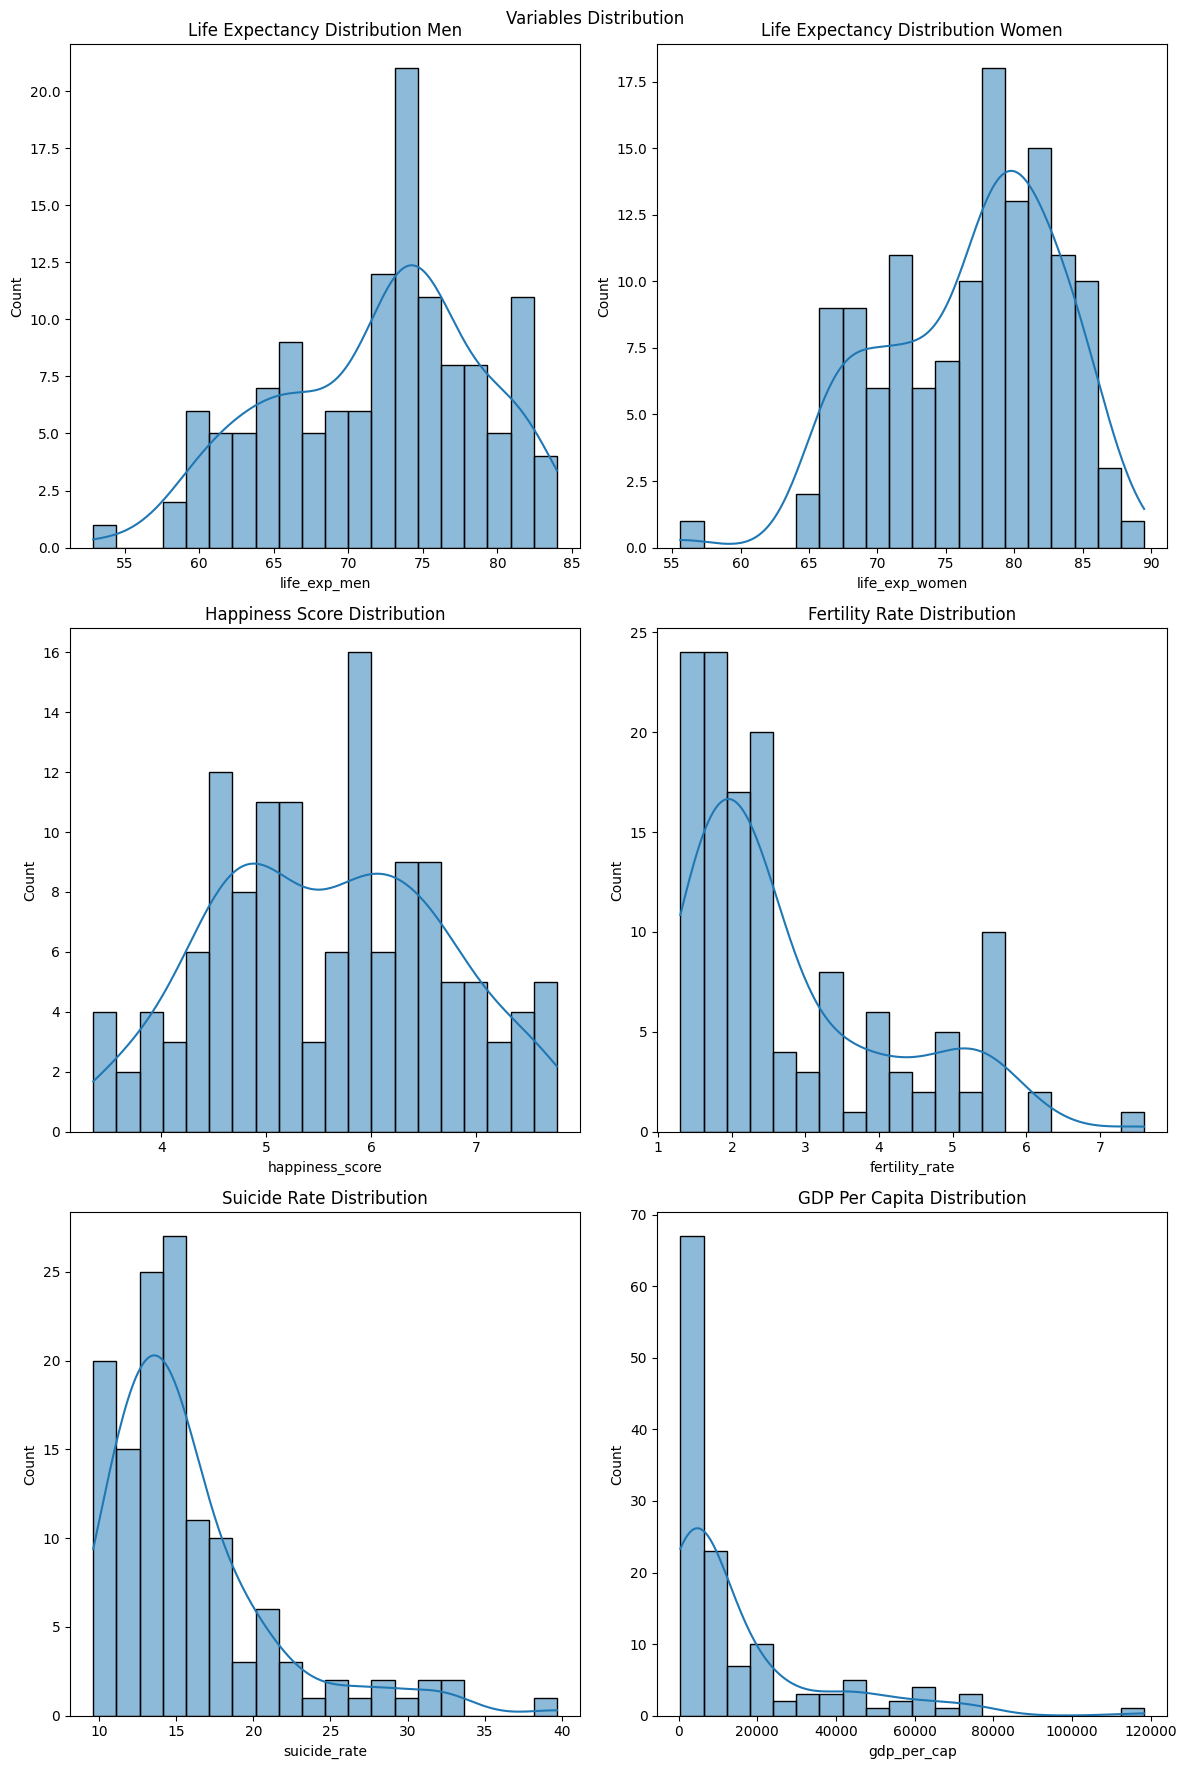

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# VARIABLES DISTRIBUTION
# Create subplots for visualizing the distribution of variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
plt.suptitle("Variables Distribution") 

# Histograms with KDE (Kernel Density Estimation) for each variable
sns.histplot(df["life_exp_men"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Life Expectancy Distribution Men") 

sns.histplot(df["life_exp_women"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Life Expectancy Distribution Women")  

sns.histplot(df["happiness_score"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Happiness Score Distribution")  

sns.histplot(df["fertility_rate"], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Fertility Rate Distribution")  

sns.histplot(df["suicide_rate"], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Suicide Rate Distribution")  

sns.histplot(df["gdp_per_cap"], bins=20, kde=True, ax=axes[2, 1])
axes[2, 1].set_title("GDP Per Capita Distribution")  

# Adjust layout to prevent overlap
plt.tight_layout()


Observations reveal that variables such as life expectancy and happiness score demonstrate distributions approximating normality, characterized by a symmetrical bell-shaped curve. Conversely, variables such as GDP per capita, fertility rate, and suicide rate exhibit strong right-skewness, where the majority of values are concentrated on the lower end of the scale, with a long tail extending towards higher values. This disparity in distribution shapes provides valuable insights into the underlying patterns and characteristics of each variable within the dataset.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

This section introduces a custom function called beautybar, designed to create visually appealing bar plots with annotations for each bar and a horizontal line representing the general average value of the plotted variable on the y-axis. The function accepts parameters such as the variable names for x and y axes, the data to be plotted, average data for the y variable, color specification, and axes object for plotting.

Subsequently, the function is applied to visualize the top and bottom 10 countries with the highest and lowest life expectancy for both men and women. Each visualization includes annotations for individual bar values and a horizontal line indicating the average life expectancy across all countries. The plots are organized into subplots to facilitate comparisons between top and bottom countries, providing comprehensive insights into life expectancy disparities globally.

         Country  life_exp_men
81         Japan          84.0
79         Italy          82.7
94    Luxembourg          82.5
78        Israel          82.5
119       Norway          82.2
57        France          82.0
129     Portugal          82.0
100        Malta          82.0
114  Netherlands          82.0
72       Iceland          81.8


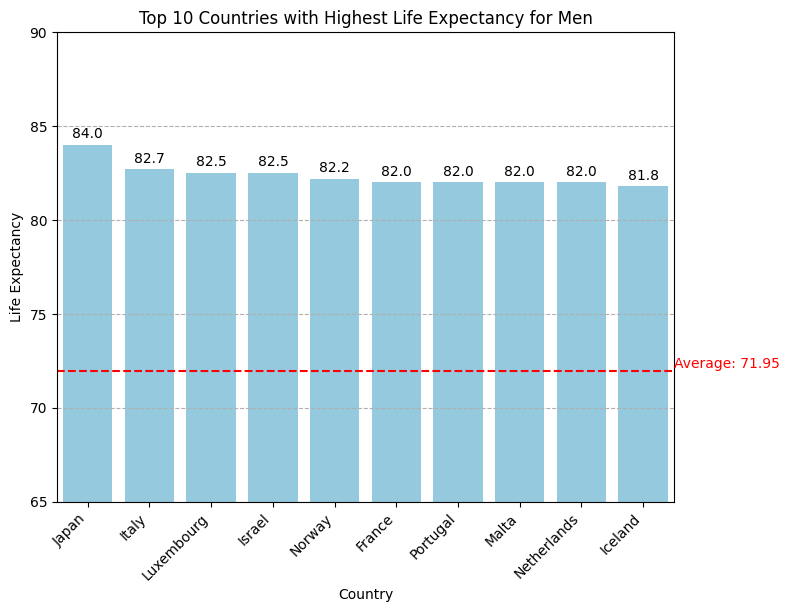

                      Country  life_exp_men
118                   Nigeria          52.9
30   Central African Republic          57.6
4                      Angola          58.1
39              Cote d'Ivoire          59.3
25               Burkina Faso          59.5
31                       Chad          59.9
99                       Mali          60.5
90                    Lesotho          60.6
0                 Afghanistan          60.6
67              Guinea-Bissau          61.0


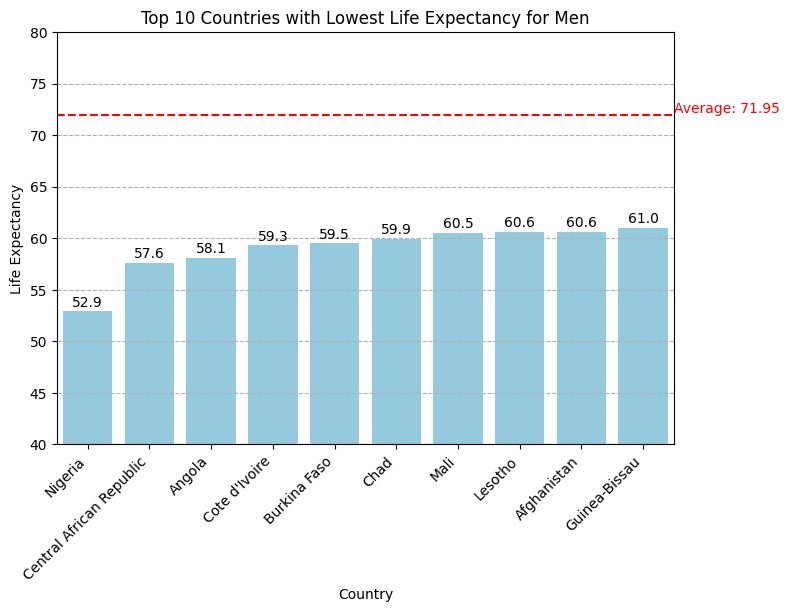

         Country  life_exp_women
81         Japan            89.5
79         Italy            87.0
94    Luxembourg            86.5
57        France            86.2
119       Norway            86.1
63        Greece            85.7
100        Malta            85.5
129     Portugal            85.5
114  Netherlands            85.0
115  New Zealand            85.0


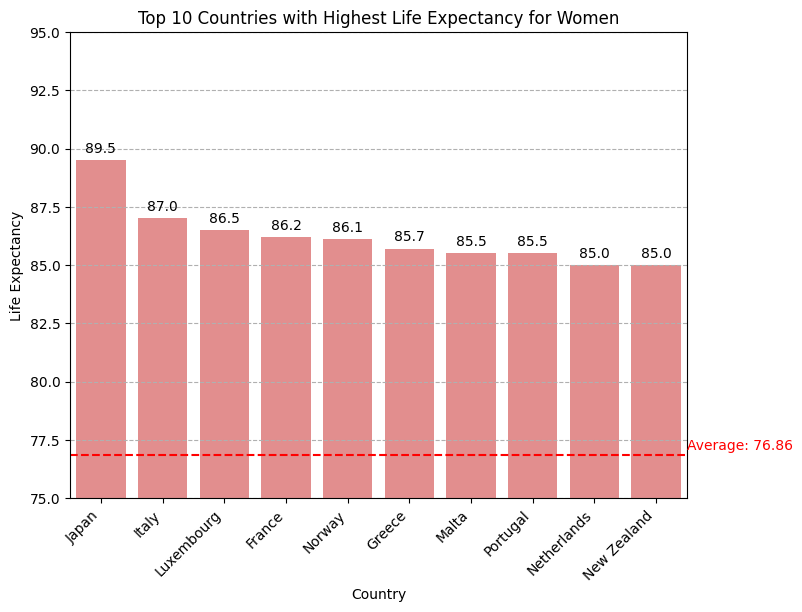

                      Country  life_exp_women
118                   Nigeria            55.6
30   Central African Republic            65.2
4                      Angola            65.6
36           Congo, Dem. Rep.            65.8
26                    Burundi            66.2
31                       Chad            66.2
39              Cote d'Ivoire            66.3
67              Guinea-Bissau            66.4
99                       Mali            66.5
90                    Lesotho            66.7


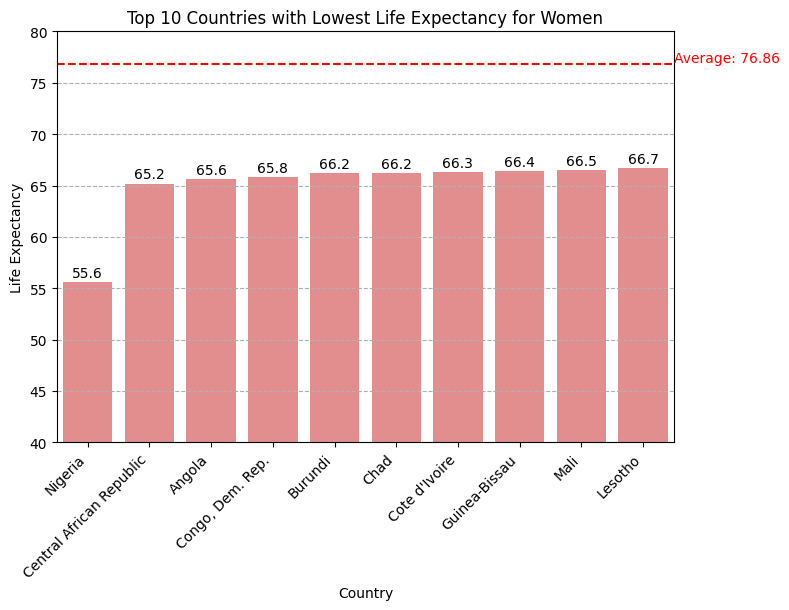

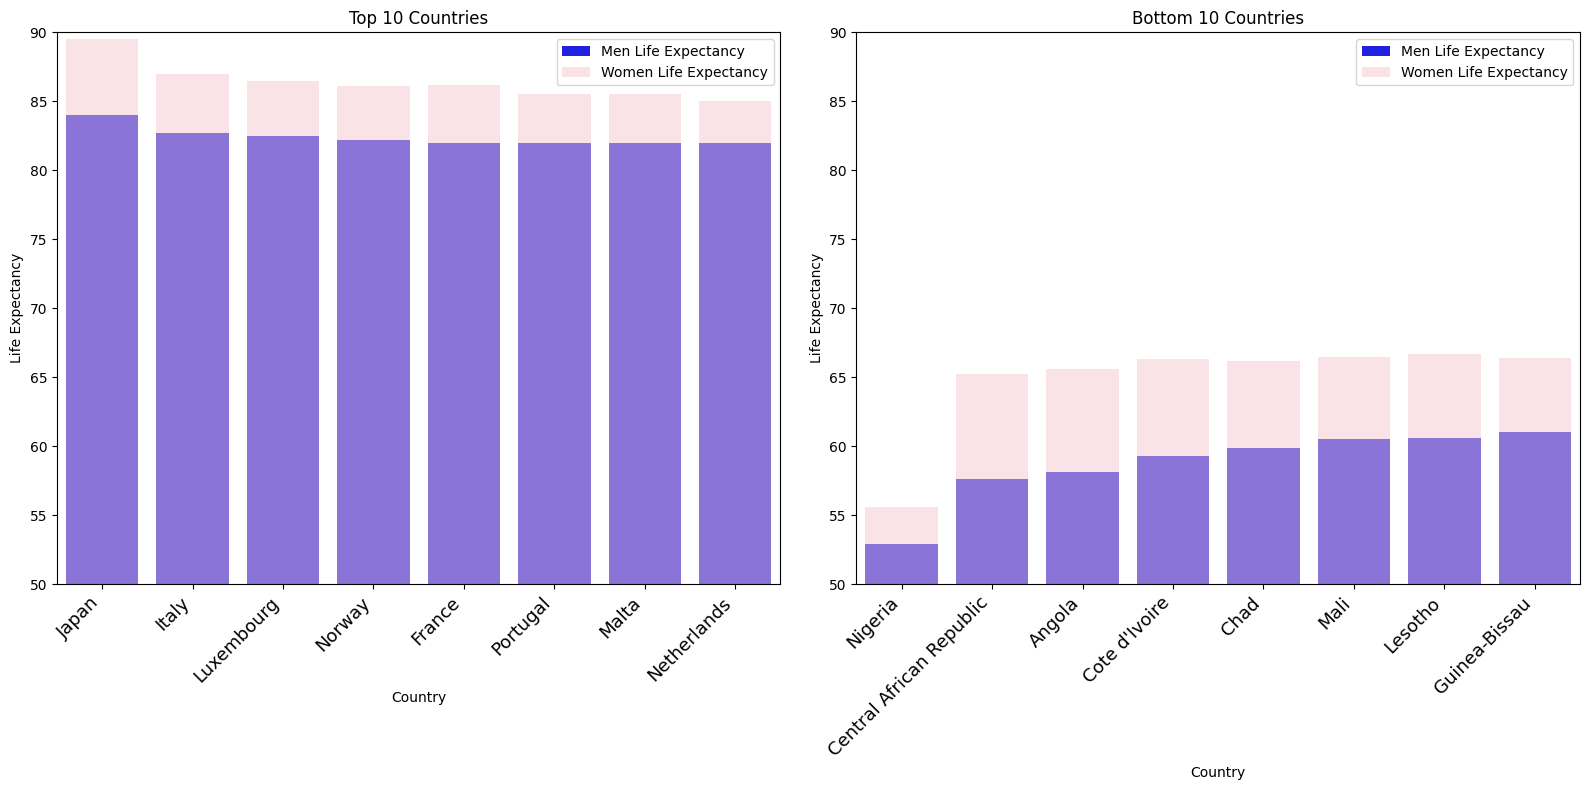

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# Define The function for the visualizations
def beautybar(x, y, data, data_avg, color="skyblue", ax=None):
    """
    Create a bar plot with annotations for each bar and a horizontal line indicating the general average value
    of the variable plotted on the y-axis.

    Parameters:
        x (str): The name of the variable to be plotted on the x-axis.
        y (str): The name of the variable to be plotted on the y-axis.
        data (DataFrame): The dataframe containing the data to be plotted.
        data_avg (DataFrame): The dataframe containing the average values for the y variable.
        color (str, optional): The color of the bars. Defaults to "skyblue".
        ax (matplotlib.axes.Axes, optional): The axes to plot on. If not provided, a new figure will be created.
    """
    if ax is None:
        ax = plt.gca()  # Get the current axes if not provided

    # Create the bar plot
    sns.barplot(x=x, y=y, data=data, color=color, ax=ax)
    
    # Add annotations for each bar
    for index, value in enumerate(data[y]):
        ax.text(index, value + 0.2, str(round(value, 2)), ha='center', va='bottom')
    
    # Calculate the average value of the y variable
    avg_variable = data_avg[y].mean()
    
    # Add a horizontal line indicating the average value
    ax.axhline(y=avg_variable, color='r', linestyle='--')
    
    # Add a text annotation for the average value
    ax.text(9.5, avg_variable + 0.2, f'Average: {round(avg_variable, 2)}', color='red')
    
    # Set labels for x and y axes
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add gridlines on the y-axis
    ax.grid(axis='y', linestyle='--')
    
    # Adjust layout for better visualization
    plt.tight_layout()
   

# Which countries have the highest and lowest life expectancy for men and women?

# Extracting the top 10 countries with the highest life expectancy for men
high_life_exp_men = df[["Country", "life_exp_men"]].sort_values("life_exp_men", ascending=False).head(10)
print(high_life_exp_men)

# Plotting the bar plot for the highest life expectancy for men
plt.figure(figsize=(8, 6))
beautybar(x="Country", y="life_exp_men", data=high_life_exp_men, data_avg=df)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.ylim(65, 90)
plt.title("Top 10 Countries with Highest Life Expectancy for Men")
plt.show()


# Extracting the top 10 countries with the lowest life expectancy for men
low_life_exp_men = df[["Country", "life_exp_men"]].sort_values("life_exp_men", ascending=True).head(10)
print(low_life_exp_men)

# Plotting the bar plot for the lowest life expectancy for men
plt.figure(figsize=(8, 6))
beautybar(x="Country", y="life_exp_men", data=low_life_exp_men, data_avg=df)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.ylim(40, 80)
plt.title("Top 10 Countries with Lowest Life Expectancy for Men")
plt.show()

# Extracting the top 10 countries with the highest life expectancy for women
high_life_exp_women = df[["Country", "life_exp_women"]].sort_values("life_exp_women", ascending=False).head(10)
print(high_life_exp_women)

# Plotting the bar plot for the highest life expectancy for women
plt.figure(figsize=(8, 6))
beautybar(x="Country", y="life_exp_women", data=high_life_exp_women, data_avg=df, color="lightcoral")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.ylim(75, 95)
plt.title("Top 10 Countries with Highest Life Expectancy for Women")
plt.show()

# Extracting the top 10 countries with the lowest life expectancy for women
low_life_exp_women = df[["Country", "life_exp_women"]].sort_values("life_exp_women", ascending=True).head(10)
print(low_life_exp_women)

# Plotting the bar plot for the lowest life expectancy for women
plt.figure(figsize=(8, 6))
beautybar(x="Country", y="life_exp_women", data=low_life_exp_women, data_avg=df, color="lightcoral")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.ylim(40, 80)
plt.title("Top 10 Countries with Lowest Life Expectancy for Women")
plt.show()

# Merging the top 10 countries with highest and lowest life expectancy for men and women to create a comprehensive plot for both variables
merged_top_10 = pd.merge(high_life_exp_men, high_life_exp_women, on="Country", suffixes=('_men', '_women'))
merged_last_10 = pd.merge(low_life_exp_men, low_life_exp_women, on="Country", suffixes=("_men","_women"))

# Creating subplots for the merged data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plotting for the first subplot (top 10 countries)
sns.barplot(x="Country", y="life_exp_men", data=merged_top_10, color="blue", label="Men Life Expectancy", ax=axes[0])
sns.barplot(x="Country", y="life_exp_women", data=merged_top_10, color="pink", label="Women Life Expectancy", alpha=0.5, ax=axes[0])
axes[0].set_title("Top 10 Countries")

# Plotting for the second subplot (bottom 10 countries)
sns.barplot(x="Country", y="life_exp_men", data=merged_last_10, color="blue", label="Men Life Expectancy", ax=axes[1])
sns.barplot(x="Country", y="life_exp_women", data=merged_last_10, color="pink", label="Women Life Expectancy", alpha=0.5, ax=axes[1])
axes[1].set_title("Bottom 10 Countries")

# Common formatting for subplots
for ax in axes:
    ax.set_xlabel("Country")
    ax.set_ylabel("Life Expectancy")
    ax.set_ylim(50, 90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=13, ha='right')
    ax.legend()

plt.tight_layout()

plt.show()

This segment offers visual insights into key indicators across countries, including Happiness Score, Fertility Rate, Suicide Rate, and GDP per Capita. Comparisons are made between the top-ranking and lowest-ranking countries in each category, providing valuable insights into well-being, demographics, mental health, and economic prosperity. Leveraging the beautybar function, these visualizations utilize bar plots with annotations for clarity and ease of interpretation, aiding in insightful comparisons.

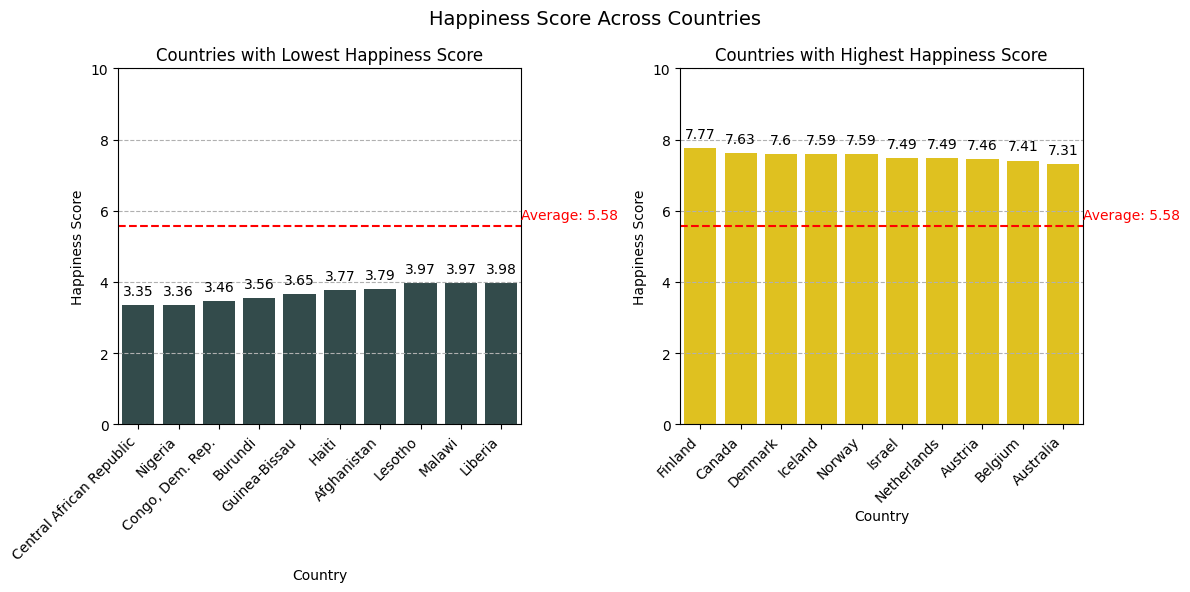

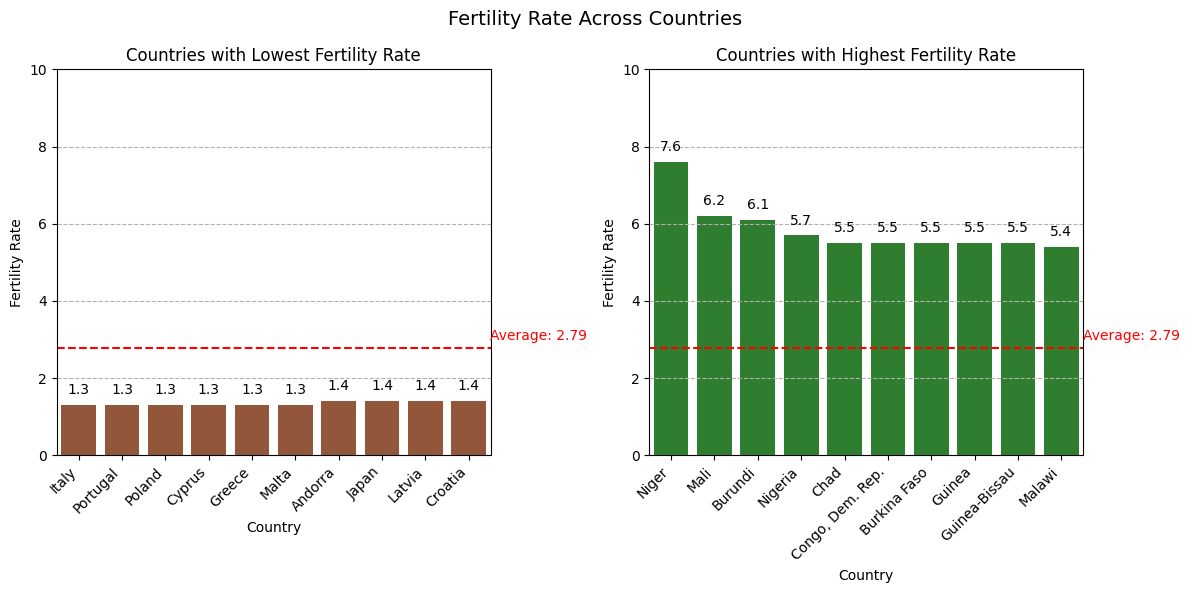

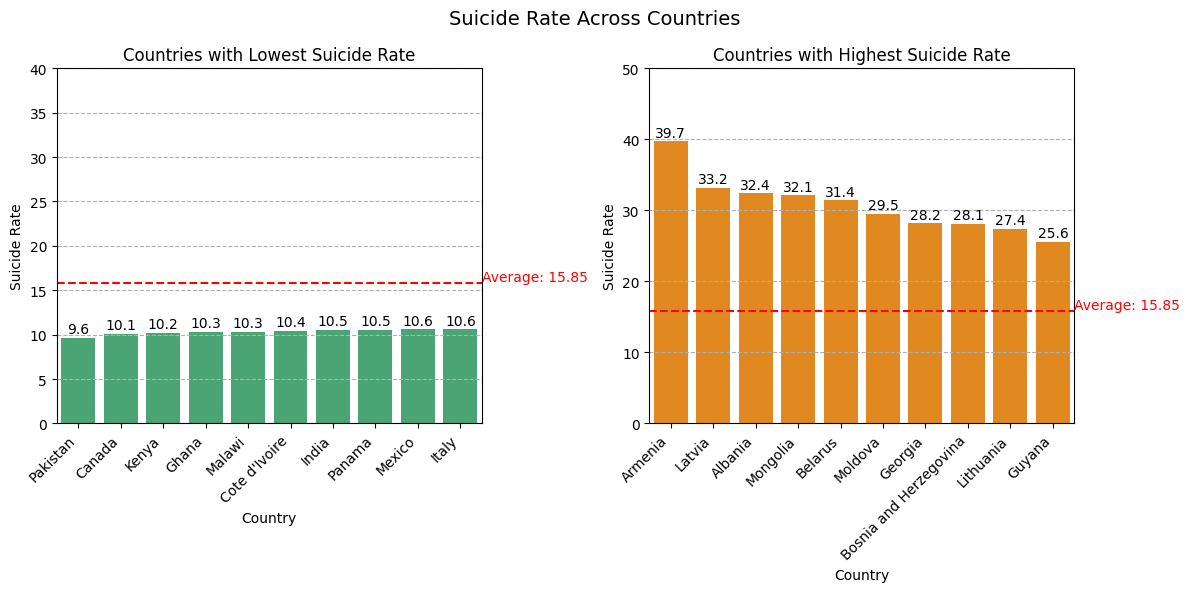

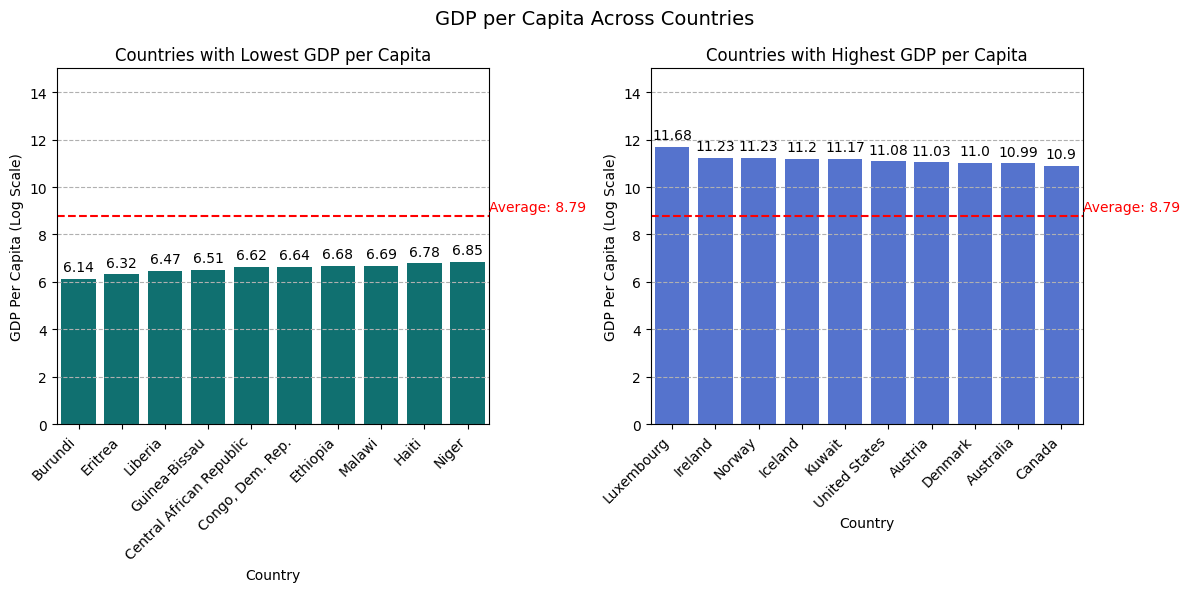

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)
df["gdp_per_cap_log"] = np.log(df["gdp_per_cap"])
#Define the Function again
def beautybar(x, y, data, data_avg, color="skyblue", ax=None):
    """
    Create a bar plot with annotations for each bar and a horizontal line indicating the general average value
    of the variable plotted on the y-axis.

    Parameters:
        x (str): The name of the variable to be plotted on the x-axis.
        y (str): The name of the variable to be plotted on the y-axis.
        data (DataFrame): The dataframe containing the data to be plotted.
        data_avg (DataFrame): The dataframe containing the average values for the y variable.
        color (str, optional): The color of the bars. Defaults to "skyblue".
        ax (matplotlib.axes.Axes, optional): The axes to plot on. If not provided, a new figure will be created.
    """
    if ax is None:
        ax = plt.gca()  # Get the current axes if not provided

    # Create the bar plot
    sns.barplot(x=x, y=y, data=data, color=color, ax=ax)
    
    # Add annotations for each bar
    for index, value in enumerate(data[y]):
        ax.text(index, value + 0.2, str(round(value, 2)), ha='center', va='bottom')
    
    # Calculate the average value of the y variable
    avg_variable = data_avg[y].mean()
    
    # Add a horizontal line indicating the average value
    ax.axhline(y=avg_variable, color='r', linestyle='--')
    
    # Add a text annotation for the average value
    ax.text(9.5, avg_variable + 0.2, f'Average: {round(avg_variable, 2)}', color='red')
    
    # Set labels for x and y axes
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add gridlines on the y-axis
    ax.grid(axis='y', linestyle='--')
    
    # Adjust layout for better visualization
    plt.tight_layout()

# Visualization of Happiness Score
happy_countries = df[["Country", "happiness_score"]].sort_values("happiness_score", ascending=False).head(10)

sad_countries = df[["Country", "happiness_score"]].sort_values("happiness_score", ascending=True).head(10)

# Plotting Happiness Score
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Happiness Score Across Countries", fontsize=14)

# Plotting for countries with the lowest happiness score
beautybar(x="Country", y="happiness_score", data=sad_countries, data_avg=df, color="darkslategray", ax=axes[0])
axes[0].set_title("Countries with Lowest Happiness Score")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Happiness Score")
axes[0].set_ylim(0, 10)

# Plotting for countries with the highest happiness score
beautybar(x="Country", y="happiness_score", data=happy_countries, data_avg=df, color="gold", ax=axes[1])
axes[1].set_title("Countries with Highest Happiness Score")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Happiness Score")
axes[1].set_ylim(0, 10)

plt.tight_layout()
plt.show()

# Visualization of Fertility Rate
most_f_country = df[["Country", "fertility_rate"]].sort_values("fertility_rate", ascending=False).head(10)

least_f_country = df[["Country", "fertility_rate"]].sort_values("fertility_rate", ascending=True).head(10)

# Plotting Fertility Rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Fertility Rate Across Countries", fontsize=14)

# Plotting for countries with the highest fertility rate
beautybar(x="Country", y="fertility_rate",data=most_f_country, data_avg=df, color="forestgreen", ax=axes[1])
axes[1].set_title("Countries with Highest Fertility Rate")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Fertility Rate")
axes[1].set_ylim(0, 10)

# Plotting for countries with the lowest fertility rate
beautybar(x="Country", y="fertility_rate",data=least_f_country, data_avg=df, color="sienna", ax=axes[0])
axes[0].set_title("Countries with Lowest Fertility Rate")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Fertility Rate")
axes[0].set_ylim(0, 10)

plt.tight_layout()
plt.show()

# Visualization of Suicide Rate
most_s_country = df[["Country", "suicide_rate"]].sort_values("suicide_rate", ascending=False).head(10)

least_s_country = df[["Country", "suicide_rate"]].sort_values("suicide_rate", ascending=True).head(10)

# Plotting Suicide Rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Suicide Rate Across Countries", fontsize=14)

# Plotting for countries with the highest suicide rate
beautybar(x="Country", y="suicide_rate", data=most_s_country, data_avg=df, color="darkorange", ax=axes[1])
axes[1].set_title("Countries with Highest Suicide Rate")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Suicide Rate")
axes[1].set_ylim(0, 50)

# Plotting for countries with the lowest suicide rate
beautybar(x="Country", y="suicide_rate", data=least_s_country, data_avg=df, color="mediumseagreen", ax=axes[0])
axes[0].set_title("Countries with Lowest Suicide Rate")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Suicide Rate")
axes[0].set_ylim(0, 40)

plt.tight_layout()
plt.show()

# Visualization of GDP per Capita
high_gdp_per_cap = df[["Country", "gdp_per_cap_log"]].sort_values("gdp_per_cap_log", ascending=False).head(10)

low_gdp_per_cap = df[["Country", "gdp_per_cap_log"]].sort_values("gdp_per_cap_log", ascending=True).head(10)

# Plotting GDP per Capita
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("GDP per Capita Across Countries", fontsize=14)

beautybar(x="Country", y="gdp_per_cap_log", data=high_gdp_per_cap, data_avg=df, color="royalblue", ax=axes[1])
axes[1].set_title("Countries with Highest GDP per Capita")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GDP Per Capita (Log Scale)")
axes[1].set_ylim(0, 15)

beautybar(x="Country", y="gdp_per_cap_log", data=low_gdp_per_cap, data_avg=df, color="teal", ax=axes[0])
axes[0].set_title("Countries with Lowest GDP per Capita")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("GDP Per Capita (Log Scale)")
axes[0].set_ylim(0, 15)

plt.tight_layout()
plt.show()


In this part of the analysis, correlation coefficients between pairs of variables are computed and displayed in a correlation matrix. Subsequently, a heatmap visualization of this correlation matrix is presented, offering a comprehensive view of the relationships between the variables. To streamline the analysis, redundant columns for life expectancy are consolidated into a single column, calculated as the mean between life expectancy for men and women. This refinement allows for a more focused examination of correlations, evident in the subsequent heatmap visualization.

                 life_exp_men  life_exp_women  ...  suicide_rate  gdp_per_cap
life_exp_men         1.000000        0.986859  ...      0.047746     0.671999
life_exp_women       0.986859        1.000000  ...      0.112386     0.639335
happiness_score      0.894045        0.882351  ...      0.011332     0.748846
fertility_rate      -0.842587       -0.855950  ...     -0.295012    -0.462330
suicide_rate         0.047746        0.112386  ...      1.000000    -0.154748
gdp_per_cap          0.671999        0.639335  ...     -0.154748     1.000000

[6 rows x 6 columns]


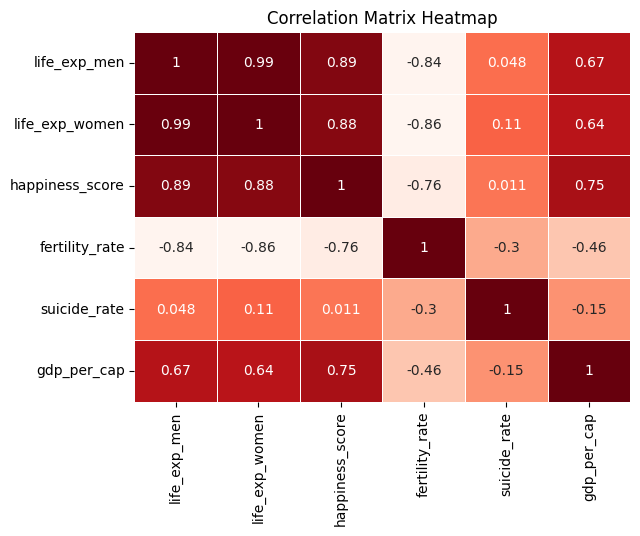

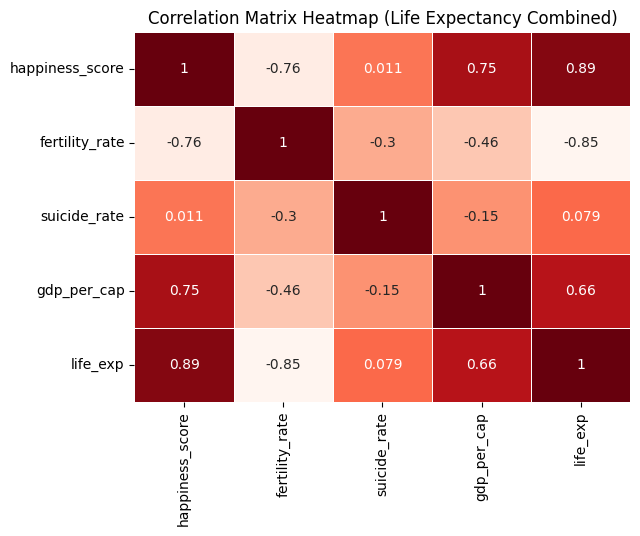

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

# CORRELATIONS
# Compute correlation coefficients between pairs of variables
correlation_matrix = df.corr()

# Print correlation matrix
print(correlation_matrix)

# Plot correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", cbar=False, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Since the two columns for life expectancy have very few differences in correlations,
# let's create only one column for life expectancy calculating the mean between the two
df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"]) / 2
df_wl = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Plot correlation matrix heatmap after removing duplicate life expectancy columns
sns.heatmap(df_wl.corr(), annot=True, cmap="Reds", cbar=False, linewidths=.5)
plt.title("Correlation Matrix Heatmap (Life Expectancy Combined)")
plt.show()

The heatmap reveals several notable correlations among the variables. There is a strong positive correlation between life expectancy and happiness score (0.89), indicating that countries with higher life expectancy tend to have higher happiness scores. Additionally, a significant positive correlation is observed between happiness score and GDP per capita (0.75), suggesting that higher levels of economic prosperity are associated with increased happiness.

Conversely, a strong negative relationship is identified between fertility rate and life expectancy (-0.85), implying that higher fertility rates are linked to lower life expectancy in a given country. Notably, there is almost no correlation between suicide rate and all other variables, suggesting that suicide rate is not strongly influenced by factors such as life expectancy, happiness score, or GDP per capita.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Here, we delve into the statistical correlations between various pairs of variables, examining their Pearson correlation coefficients and determining if these correlations are statistically significant.

For instance, the analysis investigates the relationship between happiness score and life expectancy, where the null hypothesis (H0) states that there is no significant correlation, while the alternative hypothesis (H1) posits the presence of a significant correlation. Similar hypotheses are formulated and tested for other pairs of variables such as happiness score and GDP per capita, GDP per capita and life expectancy, happiness score and fertility rate, fertility rate and life expectancy, happiness score and suicide rate, GDP per capita and suicide rate, and finally, life expectancy and suicide rate.

The results of these statistical analyses provide insights into the relationships between these variables, helping to uncover any significant correlations that may exist within the dataset.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# STATISTICAL CORRELATIONS
def pearson_correlation(x, y):
    """
    Compute the Pearson correlation coefficient for two variables and determine if there is a statistically significant correlation.

    Parameters:
    - x (Series): First variable for correlation.
    - y (Series): Second variable for correlation.

    Returns:
    - None
    """
    # Calculate the Pearson correlation coefficient and p-value.
    correlation_coefficient, p_value = pearsonr(x, y)
    alpha = 0.05  # Set the significance level.

    # Print the correlation coefficient and p-value.
    print("Pearson Correlation Coefficient:", correlation_coefficient)
    print("P-value:", p_value)

    # Determine if the correlation is statistically significant based on the p-value.
    if p_value < alpha:
        print(f"There is a statistically significant correlation between {x.name} and {y.name}.")
    else:
        print(f"There is no statistically significant correlation between {x.name} and {y.name}.")

# Statistical Relations: Happiness Score and Life Expectancy
## Null Hypothesis (H0): There is no significant correlation between happiness score and life expectancy.
## Alternative Hypothesis (H1): There is a significant correlation between happiness score and life expectancy.
pearson_correlation(df["happiness_score"], df["life_exp"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: Happiness Score and GDP per Capita 
## Null Hypothesis (H0): There is no significant correlation between happiness score and GDP per capita.
## Alternative Hypothesis (H1): There is a significant correlation between happiness score and GDP per capita.
pearson_correlation(df["happiness_score"], df["gdp_per_cap"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: GDP per Capita and Life Expectancy
## Null Hypothesis (H0): There is no significant correlation between GDP per capita and life expectancy.
## Alternative Hypothesis (H1): There is a significant correlation between GDP per capita and life expectancy.
pearson_correlation(df["gdp_per_cap"], df["life_exp"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: Happiness Score and Fertility Rate
## Null Hypothesis (H0): There is no significant correlation between happiness score and fertility rate.
## Alternative Hypothesis (H1): There is a significant correlation between happiness score and fertility rate.
pearson_correlation(df["happiness_score"], df["fertility_rate"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: Fertility Rate and Life Expectancy
## Null Hypothesis (H0): There is no significant correlation between fertility rate and life expectancy.
## Alternative Hypothesis (H1): There is a significant correlation between fertility rate and life expectancy.
pearson_correlation(df["fertility_rate"], df["life_exp"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: Happiness Score and Suicide Rate 
## Null Hypothesis (H0): There is no significant correlation between Happiness Score and Suicide Rate.
## Alternative Hypothesis (H1): There is a significant correlation between Happiness Score and Suicide Rate.
pearson_correlation(df["happiness_score"], df["suicide_rate"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: GDP Per Capita and Suicide Rate 
## Null Hypothesis (H0): There is no significant correlation between GDP Per Capita and Suicide Rate.
## Alternative Hypothesis (H1): There is a significant correlation between GDP Per Capita and Suicide Rate.
pearson_correlation(df["gdp_per_cap"], df["suicide_rate"])

print("----------------------------------------------------------------------------------------------")

# Statistical Relations: Life Expectancy and Suicide Rate 
## Null Hypothesis (H0): There is no significant correlation between Life Expectancy and Suicide Rate.
## Alternative Hypothesis (H1): There is a significant correlation between Life Expectancy and Suicide Rate.
pearson_correlation(df["life_exp"], df["suicide_rate"])


Pearson Correlation Coefficient: 0.8913497144194376
P-value: 1.6804064426842317e-46
There is a statistically significant correlation between happiness_score and life_exp.
----------------------------------------------------------------------------------------------
Pearson Correlation Coefficient: 0.7488456605021346
P-value: 5.523208687865692e-25
There is a statistically significant correlation between happiness_score and gdp_per_cap.
----------------------------------------------------------------------------------------------
Pearson Correlation Coefficient: 0.6584528082041889
P-value: 9.471293809692286e-18
There is a statistically significant correlation between gdp_per_cap and life_exp.
----------------------------------------------------------------------------------------------
Pearson Correlation Coefficient: -0.7573106721270547
P-value: 8.051840399234658e-26
There is a statistically significant correlation between happiness_score and fertility_rate.
----------------------------

The Pearson correlation analysis reveals several significant relationships between key variables in our dataset, but it's essential to recognize that correlation does not imply causation. 

Firstly, there's a robust positive correlation (0.89) between happiness score and life expectancy, supported by an extremely low p-value (1.68e-46), suggesting a strong statistical significance. This finding speculates that happier countries tend to have higher life expectancies, a relationship consistent with our earlier observation from the heatmap analysis. 

Additionally, there's a notable positive correlation (0.75) between happiness score and GDP per capita, with a similarly low p-value (5.52e-25), implying that countries with higher GDP per capita tend to report higher levels of happiness. This speculation aligns with the heatmap's indication of a strong relationship between these variables. 

Moreover, the analysis identifies a significant positive correlation (0.66) between GDP per capita and life expectancy, with a low p-value (9.47e-18), suggesting that countries with higher GDP per capita tend to have longer life expectancies. This observation aligns with the heatmap's suggestion of a strong correlation between these factors. 

Conversely, there's a substantial negative correlation (-0.76) between happiness score and fertility rate, supported by a low p-value (8.05e-26). This implies that countries with higher fertility rates tend to report lower levels of happiness, a relationship also reflected in the heatmap. 

Finally, no statistically significant correlations are found between happiness score and suicide rate, GDP per capita and suicide rate, as well as life expectancy and suicide rate, as indicated by their respective p-values (0.897, 0.076, and 0.367).

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In this section, a function called reg_scatter is introduced, allowing for the creation of scatter plots with regression lines. This function extends seaborn's regplot functionality by incorporating parameters such as hue and size for added customization. Following this, a new dataset (df_3) is incorporated, providing continent and population information.

Subsequently, visualizations of variable relationships are presented through subplots. The first plot examines the relationship between happiness score and life expectancy, highlighting outliers such as Nigeria. The second plot analyzes the correlation between GDP per capita and happiness score, accounting for different continents and population sizes. The third plot investigates how GDP per capita relates to life expectancy, with continent distinctions and population sizes. The fourth plot examines the connection between fertility rate and happiness score, considering continent variations and GDP per capita sizes. The fifth plot analyzes how fertility rate impacts life expectancy, with continent distinctions and GDP per capita sizes. Finally, the sixth plot investigates the relationship between suicide rate and happiness score, while considering continent variations and GDP per capita sizes. These visualizations aim to offer insights into the relationships between these variables, considering factors like continent variations and population sizes.

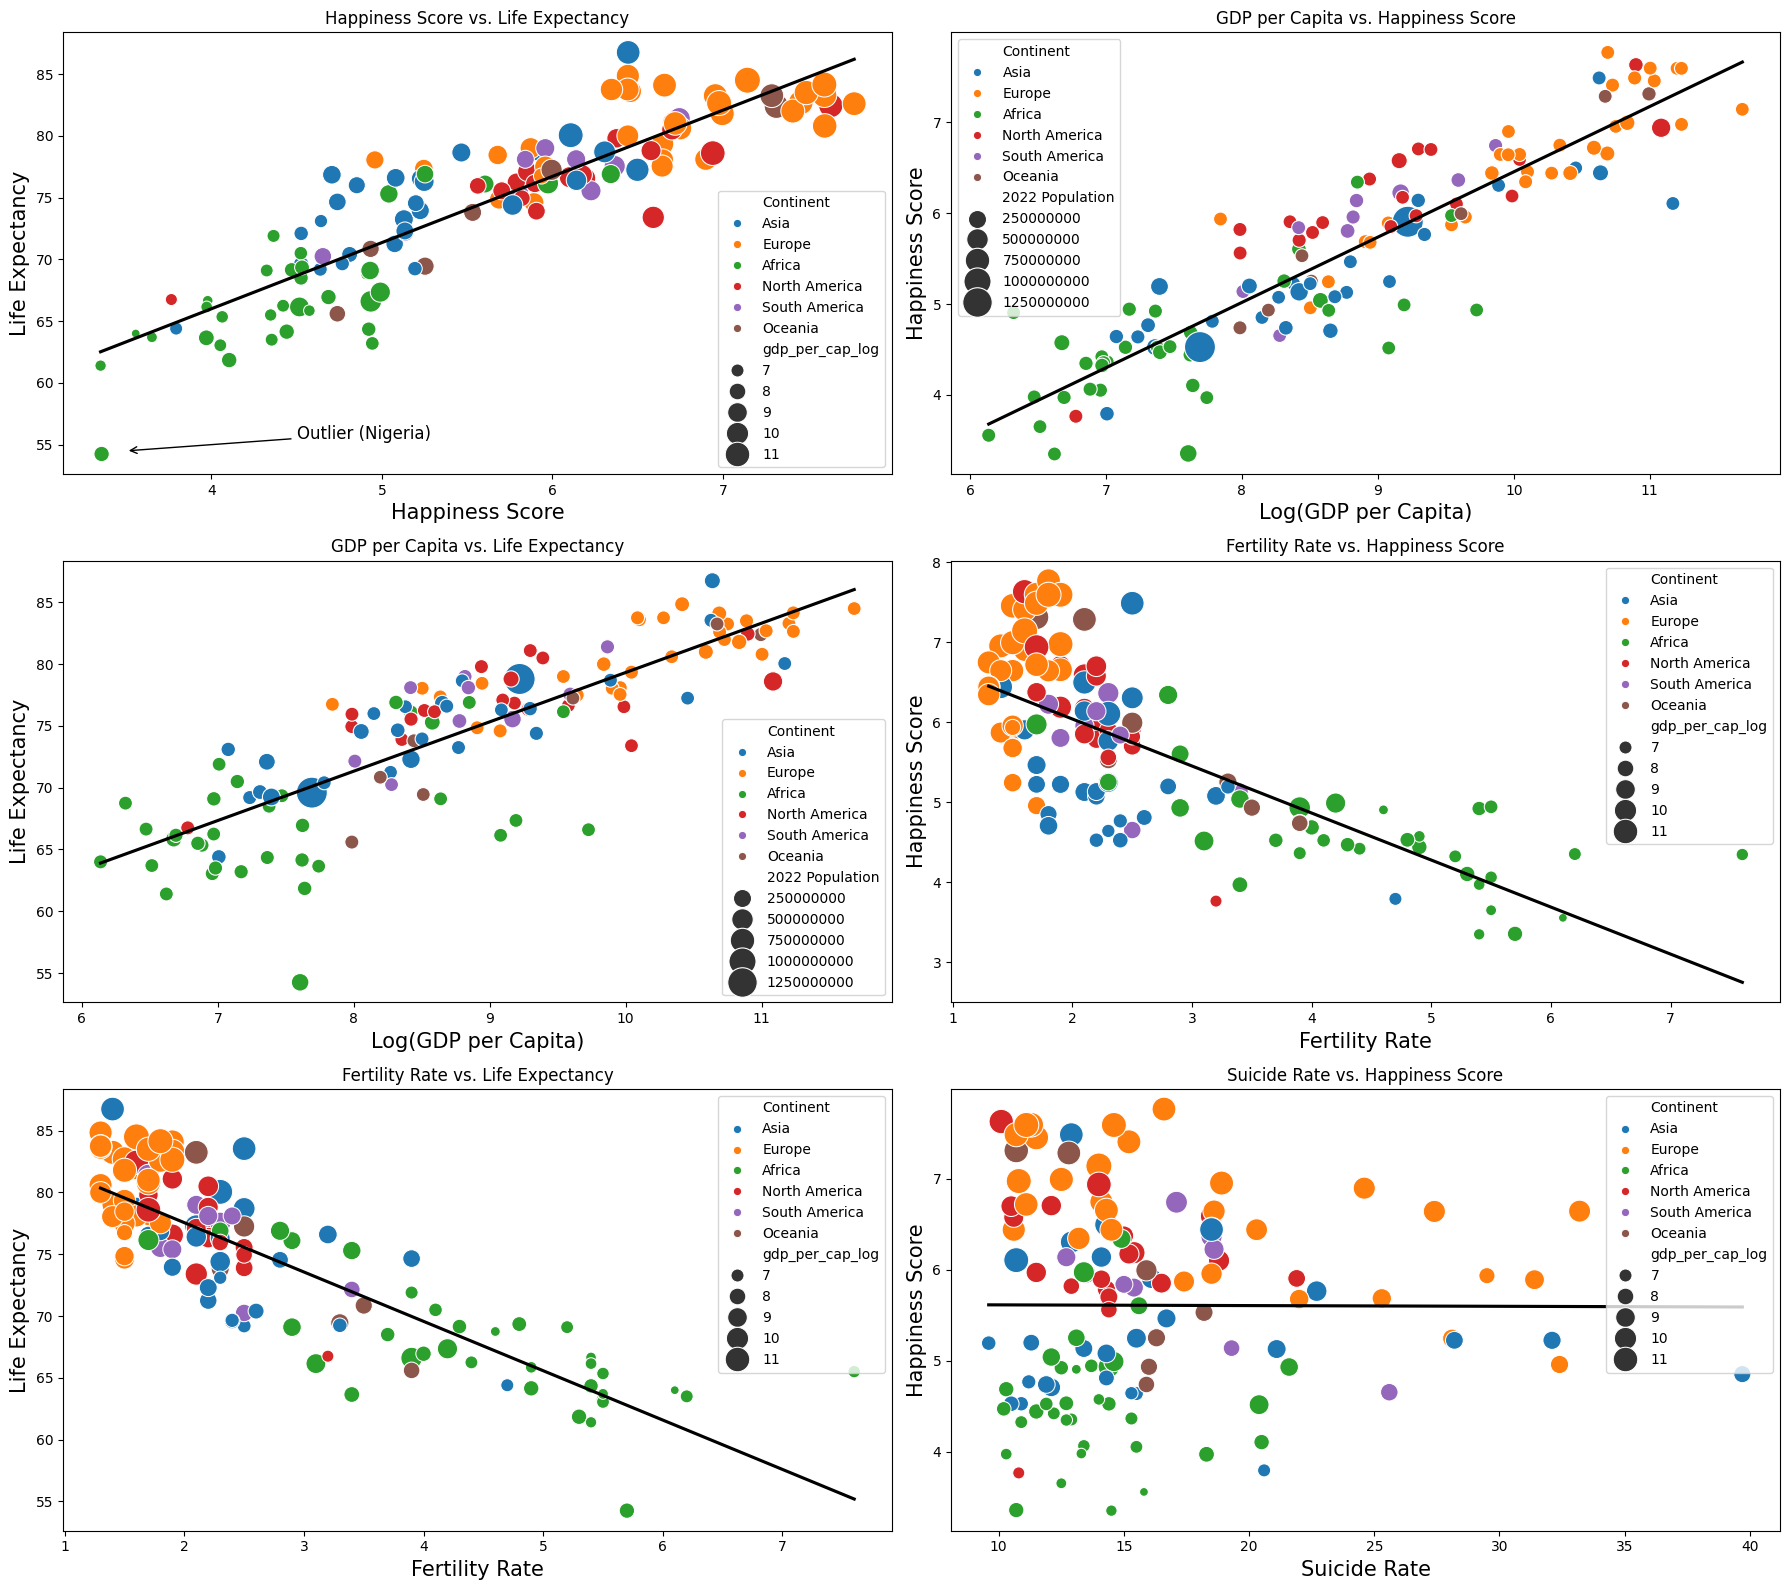

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)
df["gdp_per_cap_log"] = np.log(df["gdp_per_cap"])

# Define the function for relations visualiztions
def reg_scatter(x, y, data, hue=None, legend="auto", size=None, sizes=None, ax=None):
    """
    Create a scatter plot with a regression line.

    Parameters:
        x (str): The name of the variable to be plotted on the x-axis.
        y (str): The name of the variable to be plotted on the y-axis.
        data (DataFrame): The dataframe containing the data to be plotted.
        hue (str, optional): Variable in data to map plot aspects to different colors.
        legend ({"auto", "brief", "full"}, optional): How to draw the legend. Defaults to "auto".
        size (str, optional): Grouping variable that will produce points with different sizes.
        sizes (tuple, optional): Tuple of minimum and maximum size values to scale the size variable.
        ax (matplotlib axes, optional): Axes object to draw the plot onto.

    Note:
        This function extends the functionality of the seaborn regplot by allowing additional parameters
        such as hue and size, which are not typically available in a standard regplot.
    """
    sns.scatterplot(x=x, y=y, data=df, ax=ax, hue=hue, legend=legend, size=size, sizes=sizes)
    sns.regplot(x=x, y=y, data=df, ax=ax, scatter=False, ci=None, line_kws={"color": "black"})

# Read another dataset to add Continent and Population information
df_3 = pd.read_csv("world_population.csv")
df_3_mod = df_3.drop(['Rank', 'CCA3', 'Capital', 'Area (km²)', 'Density (per km²)',
                      'Growth Rate', 'World Population Percentage'], axis=1)
df_3_mod["Country"] = df_3_mod["Country/Territory"]

# Merge the population dataset with the main DataFrame
df = pd.merge(df, df_3_mod, on="Country", how="left")
df = df.drop("Country/Territory", axis=1)
df = df.dropna()

# VISUALIZATION OF VARIABLE RELATIONSHIPS 

# Create subplots grid for visualizing multiple relationships
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))

# Plot 1: Happiness Score vs. Life Expectancy
reg_scatter(x="happiness_score", y="life_exp", data=df, ax=axes[0, 0], hue="Continent", legend="auto", 
                size="gdp_per_cap_log", sizes=(40, 350))
outlier_x = 3.5
outlier_y = 54.5
axes[0, 0].annotate('Outlier (Nigeria)', xy=(outlier_x, outlier_y), xytext=(outlier_x + 1, outlier_y + 1),
                  arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
axes[0, 0].set_title("Happiness Score vs. Life Expectancy")
axes[0, 0].set_xlabel("Happiness Score", fontsize=15)
axes[0, 0].set_ylabel("Life Expectancy", fontsize=15)

# Plot 2: GDP per Capita vs. Happiness Score
reg_scatter(x="gdp_per_cap_log", y="happiness_score", data=df, ax=axes[0, 1], hue="Continent", 
                legend="auto", size="2022 Population", sizes=(100, 500))
axes[0, 1].set_title("GDP per Capita vs. Happiness Score")
axes[0, 1].set_xlabel("Log(GDP per Capita)", fontsize=15)
axes[0, 1].set_ylabel("Happiness Score", fontsize=15)

# Plot 3: GDP per Capita vs. Life Expectancy
reg_scatter(x="gdp_per_cap_log", y="life_exp", data=df, ax=axes[1, 0], hue="Continent", 
                legend="auto", size="2022 Population", sizes=(100, 500))
axes[1, 0].set_title("GDP per Capita vs. Life Expectancy")
axes[1, 0].set_xlabel("Log(GDP per Capita)", fontsize=15)
axes[1, 0].set_ylabel("Life Expectancy", fontsize=15)

# Plot 4: Fertility Rate vs. Happiness Score
reg_scatter(x="fertility_rate", y="happiness_score", data=df, ax=axes[1, 1], hue="Continent", 
                legend="auto", size="gdp_per_cap_log", sizes=(40, 350))
axes[1, 1].set_title("Fertility Rate vs. Happiness Score")
axes[1, 1].set_xlabel("Fertility Rate", fontsize=15)
axes[1, 1].set_ylabel("Happiness Score", fontsize=15)

# Plot 5: Fertility Rate vs. Life Expectancy
reg_scatter(x="fertility_rate", y="life_exp", data=df, ax=axes[2, 0], hue="Continent", 
                legend="auto", size="gdp_per_cap_log", sizes=(40, 350))
axes[2, 0].set_title("Fertility Rate vs. Life Expectancy")
axes[2, 0].set_xlabel("Fertility Rate", fontsize=15)
axes[2, 0].set_ylabel("Life Expectancy", fontsize=15)

# Plot 6: Suicide Rate vs. Happiness Score
reg_scatter(x="suicide_rate", y="happiness_score", data=df, ax=axes[2, 1], hue="Continent", 
                legend="auto", size="gdp_per_cap_log", sizes=(40, 350))
axes[2, 1].set_title("Suicide Rate vs. Happiness Score")
axes[2, 1].set_xlabel("Suicide Rate", fontsize=15)
axes[2, 1].set_ylabel("Happiness Score", fontsize=15)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Now the focus shifts to machine learning, specifically predicting life expectancy. The process begins with fine-tuning using Random Search to identify optimal hyperparameter ranges. Key libraries like scikit-learn for model selection and evaluation are imported. Additionally, a function named visualize_hyperparameter is defined to illustrate the impact of hyperparameters on model performance.

The data is prepared by splitting it into features (X) and the target variable (y), with "life_exp" being the target variable. Irrelevant columns such as "Country" are removed from the features. The dataset is then divided into training and testing sets using a 70/30 split.

Hyperparameter ranges are defined for the Random Forest Regressor model, including n_estimators, criterion, max_depth, and min_samples_leaf. These ranges are crucial for Randomized Search CV, which is employed to find the optimal hyperparameters. The search is performed using 10-fold cross-validation with 15 iterations.

After fitting the model, the best hyperparameters and corresponding scores are extracted. Visualizations are created to depict the effects of individual hyperparameters on model performance. This includes plotting the impact of n_estimators, max_depth, and min_samples_leaf on the mean squared error. These visualizations offer insights into how different hyperparameters influence the predictive capabilities of the model.

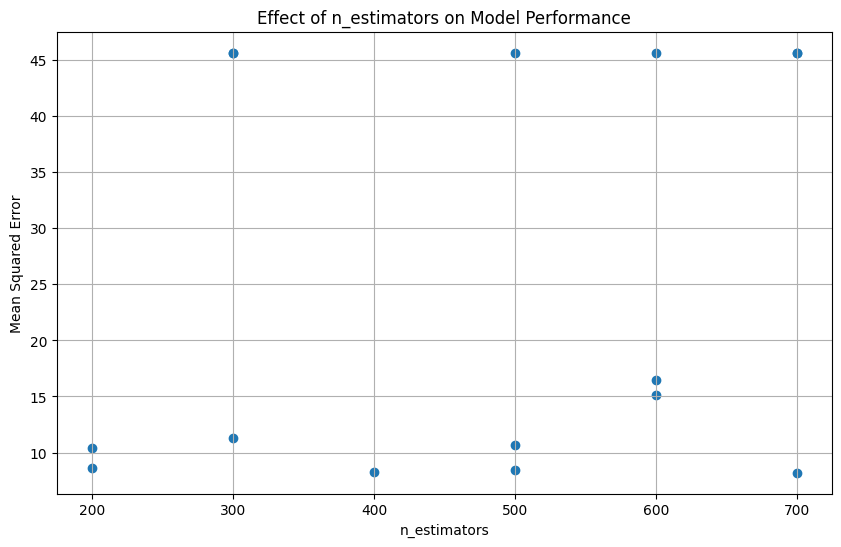

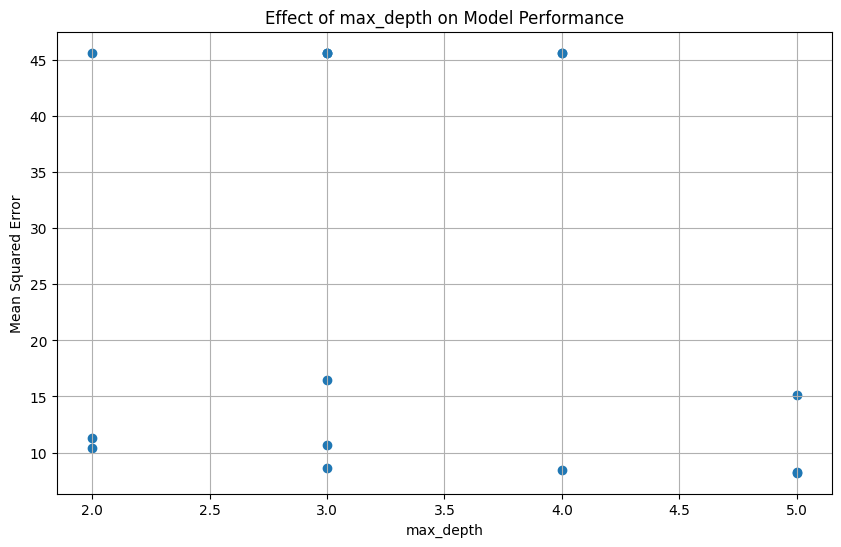

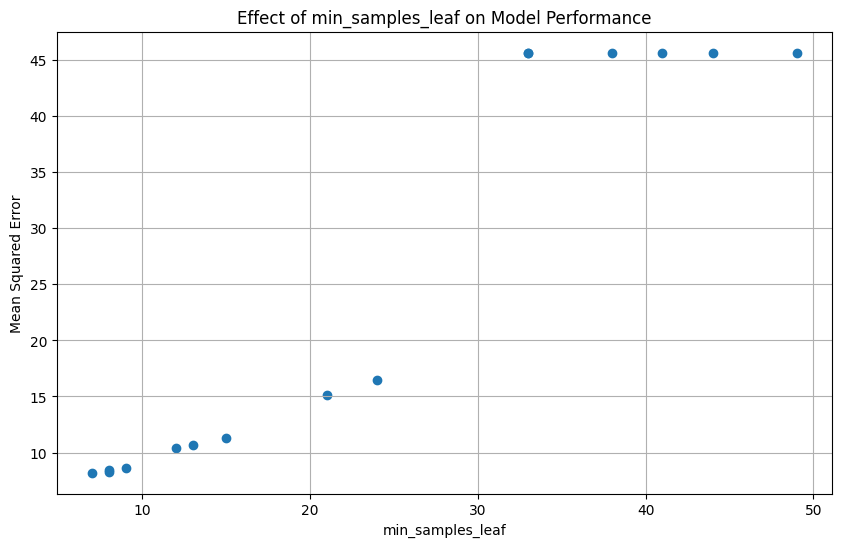

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Machine Learning: Predicting Life Expectancy
# Fine-Tuning with Random Search to Find Optimal Hyperparameter Ranges

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Define function to visualize the effect of hyperparameters on model performance
def visualize_hyperparameter(param_name, param_values, scores):
    """
    Visualize the effect of a hyperparameter on model performance.
    
    Parameters:
        param_name (str): Name of the hyperparameter.
        param_values (list): List of values for the hyperparameter.
        scores (list): List of mean squared error scores corresponding to each hyperparameter value.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(param_values, scores, marker='o')
    plt.title(f"Effect of {param_name} on Model Performance")
    plt.xlabel(param_name)
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

# Prepare the data
X = df.drop(["Country", "life_exp"], axis=1)
y = df["life_exp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define hyperparameter ranges
n_estimators = np.arange(200, 800, 100)
criterion = ["squared_error"]
max_depth = np.arange(2, 6, 1)
min_samples_leaf = range(1, 50)
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf
}

# Initialize and run Randomized Search CV
model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                           param_distributions=param_grid,
                           n_iter=15,
                           scoring="neg_mean_squared_error",
                           n_jobs=4,
                           cv=10,
                           refit=True)
model.fit(X_train, y_train)

# Extract the best hyperparameters and corresponding scores
best_n_estimators = [model.cv_results_['params'][i]['n_estimators'] for i in range(model.n_iter)]
best_scores = model.cv_results_['mean_test_score']

# Visualize the effect of 'n_estimators' on model performance
visualize_hyperparameter("n_estimators", best_n_estimators, -best_scores)

# Extract and visualize the effect of 'max_depth' on model performance
best_max_depth = [model.cv_results_['params'][i]['max_depth'] for i in range(model.n_iter)]
visualize_hyperparameter("max_depth", best_max_depth, -best_scores)

# Extract and visualize the effect of 'min_samples_leaf' on model performance
best_min_samples_leaf = [model.cv_results_['params'][i]['min_samples_leaf'] for i in range(model.n_iter)]
visualize_hyperparameter("min_samples_leaf", best_min_samples_leaf, -best_scores)


From the visualizations, we can observe several promising areas where further exploration could yield improved model performance. Specifically, for the max_depth hyperparameter, the range between 3 and 5 demonstrates potential for fine-tuning. This suggests that limiting the depth of the individual decision trees within the Random Forest could enhance predictive accuracy.

Similarly, the n_estimators hyperparameter exhibits a promising range between 200 and 400. This indicates that focusing on a moderate number of decision trees, rather than excessively increasing or decreasing their quantity, might optimize the model's predictive capabilities.

Additionally, the range for min_samples_leaf between 1 and 10 shows potential for refinement. This parameter governs the minimum number of samples required to be at a leaf node of the decision trees, and exploring values within this range could lead to improved generalization and performance.

These insights guide us towards conducting a more focused grid search in subsequent steps, targeting these promising areas to further optimize the Random Forest Regressor model.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(["Country", "life_exp"], axis=1)
y = df["life_exp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define the ranges for hyperparameters
n_estimators = np.arange(200, 400, 100)
criterion = ["squared_error"]
max_depth = np.arange(3, 5)  
min_samples_leaf = range(1, 10)

# Define the parameter grid
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf
}

# Perform Grid Search Cross Validation
model = GridSearchCV(estimator = RandomForestRegressor(),
                    param_grid = param_grid,
                    scoring = "neg_mean_squared_error",
                    n_jobs=4,
                    cv = 10,
                    refit=True,
                    return_train_score=True)
model.fit(X_train, y_train)

# Display the results of Grid Search
cv_results_df = pd.DataFrame(model.cv_results_)
print(cv_results_df)

# Print the best estimator found by Grid Search
print(model.best_estimator_)

    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        0.178265      0.005490  ...         -3.406939         0.246217
1        0.257113      0.002295  ...         -3.431961         0.224841
2        0.172464      0.000896  ...         -3.662305         0.276639
3        0.258265      0.001411  ...         -3.668220         0.301951
4        0.173766      0.000718  ...         -3.970968         0.298576
5        0.257947      0.002388  ...         -3.956186         0.301079
6        0.178279      0.008597  ...         -4.297948         0.343251
7        0.263705      0.003493  ...         -4.291370         0.348882
8        0.175370      0.003404  ...         -4.633795         0.386210
9        0.256363      0.002660  ...         -4.604356         0.378160
10       0.173739      0.002096  ...         -4.879503         0.406914
11       0.257200      0.003564  ...         -4.859823         0.390768
12       0.177631      0.006122  ...         -5.036745         0

After conducting the grid search within the specified ranges of hyperparameters, the best_estimator_ returned the following configuration: RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=200). With this optimized configuration in hand, we are now poised to assess its performance by applying it to our test dataset and evaluating the relevant metrics. This step will provide valuable insights into how well our model generalizes to unseen data and its overall predictive efficacy

Mean Squared Error (MSE): 4.7514902541007045
Root Mean Squared Error (RMSE): 2.1797913326969405
Mean Absolute Error (MAE): 1.6691138291971626
R-squared (R2): 0.8676762228299951


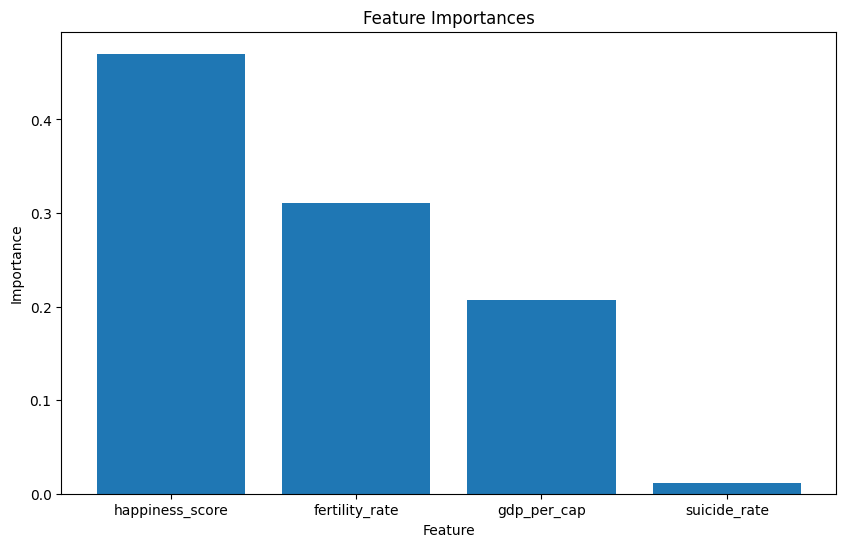

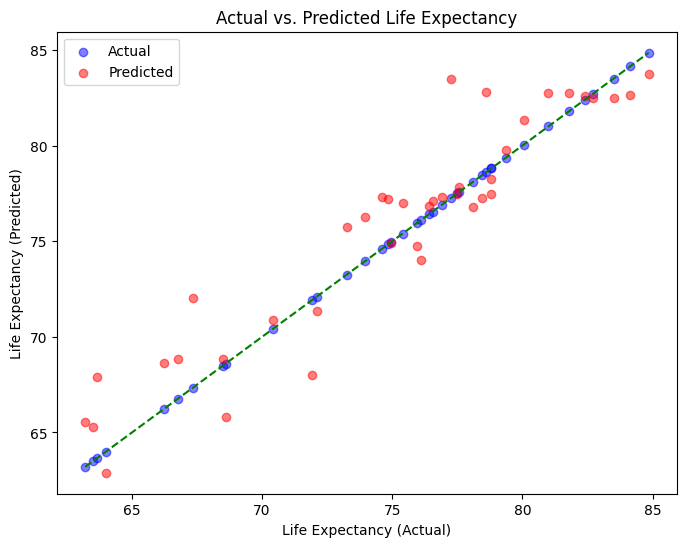

The scatter plot above compares the actual life expectancy values with the predicted values.
The red line represents the line of equality, where predicted values would perfectly match actual values.
If the points lie close to the red line, it indicates that the model's predictions are accurate.


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = df.drop(["Country", "life_exp"], axis=1)
y = df["life_exp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Train the RandomForestRegressor model with specified hyperparameters
model = RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=300)
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, color='b', label='Actual')  # Actual values
plt.scatter(y_test, pred, alpha=0.5, color='r', label='Predicted')  # Predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='--')  # Line of equality
plt.title("Actual vs. Predicted Life Expectancy")
plt.xlabel("Life Expectancy (Actual)")
plt.ylabel("Life Expectancy (Predicted)")
plt.legend()
plt.show()

# Explanation
print("The scatter plot above compares the actual life expectancy values with the predicted values.")
print("The red line represents the line of equality, where predicted values would perfectly match actual values.")
print("If the points lie close to the red line, it indicates that the model's predictions are accurate.")


The results of the model evaluation provide crucial insights into its performance within the context of the project. 

The Mean Squared Error (MSE) value of 4.75, being squared, implies that, on average, the squared differences between the model's predictions and the actual life expectancy values amount to approximately 4.75 square years. This metric is crucial for our project as it quantifies the average magnitude of errors in the model's predictions, providing valuable insights into the predictive accuracy within the context of life expectancy prediction.

The Root Mean Squared Error (RMSE) of 2.18 further refines our understanding by presenting the average magnitude of errors in the model's predictions. A value of 2.18 suggests that, on average, the model's predictions deviate by approximately 2.18 years from the actual life expectancy, providing a tangible measure of the model's predictive accuracy within the scope of our project.

Moving to the Mean Absolute Error (MAE), which stands at 1.67, we gain insights into the average absolute difference between the model's predictions and the actual values of life expectancy. This metric is valuable for our project as it offers a straightforward interpretation of the model's predictive performance, indicating that, on average, the model's predictions deviate by approximately 1.67 years from the actual life expectancy values.

The R-squared (R2) value of 0.87 holds significant importance for our project, as it signifies the proportion of the variance in life expectancy that is explained by the predictors included in the model. With an R2 value of 0.87, it suggests that approximately 87% of the variability in life expectancy across different populations can be attributed to the features considered in our model. This indicates a strong fit of the model to the data, highlighting its effectiveness in capturing the underlying relationships between the predictor variables and life expectancy. 

From the visualization of feature importances, it's evident that certain variables significantly influence the model's predictions of life expectancy. The most crucial feature for predicting life expectancy appears to be the happiness score, indicating its substantial impact on life expectancy outcomes. Following closely behind are the fertility rate and GDP per capita, suggesting their importance in understanding and forecasting life expectancy trends. These insights gleaned from feature importances help us prioritize factors to focus on and potentially intervene in to positively influence life expectancy outcomes.


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In this second machine learning model, we're using the XGBRegressor algorithm to predict happiness scores. The process follows a similar pattern as before: we first prepare the data by splitting it into training and testing sets. Then, we define ranges for the hyperparameters, including the number of estimators, maximum depth of trees, learning rate, and minimum child weight.

We then employ Randomized Search CV to explore a range of hyperparameter combinations and identify promising areas. This is followed by visualizing the effects of each hyperparameter on model performance to narrow down the search space.

Next, we conduct a grid search within these promising ranges to find the best estimator for the XGBRegressor model. Finally, we evaluate the performance of the best estimator using metrics such as mean squared error, root mean squared error, mean absolute error, and R-squared. 

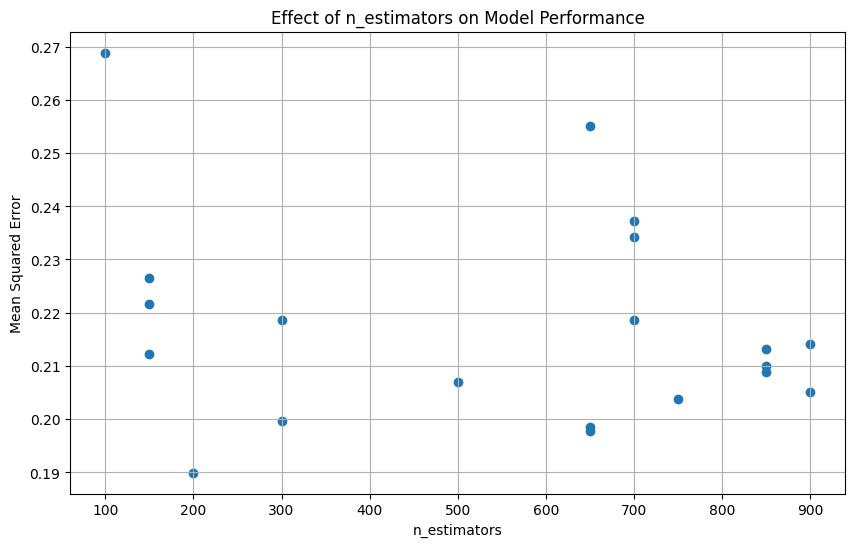

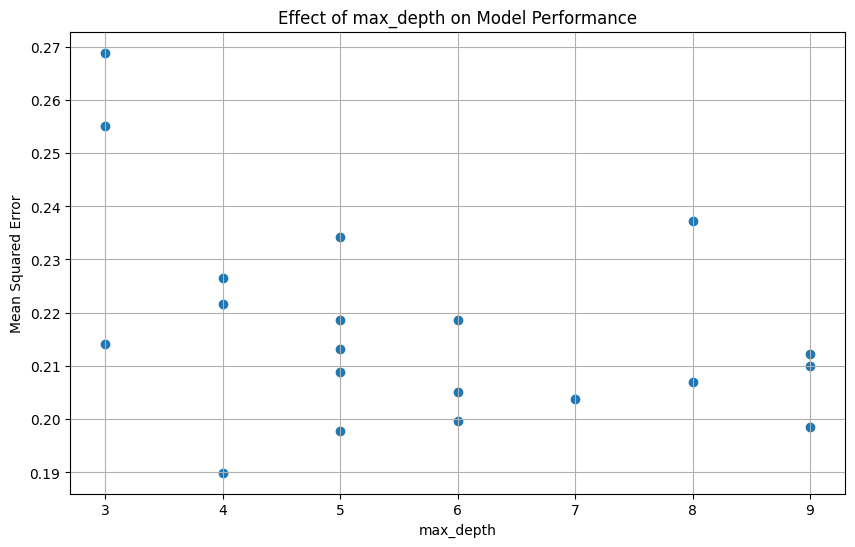

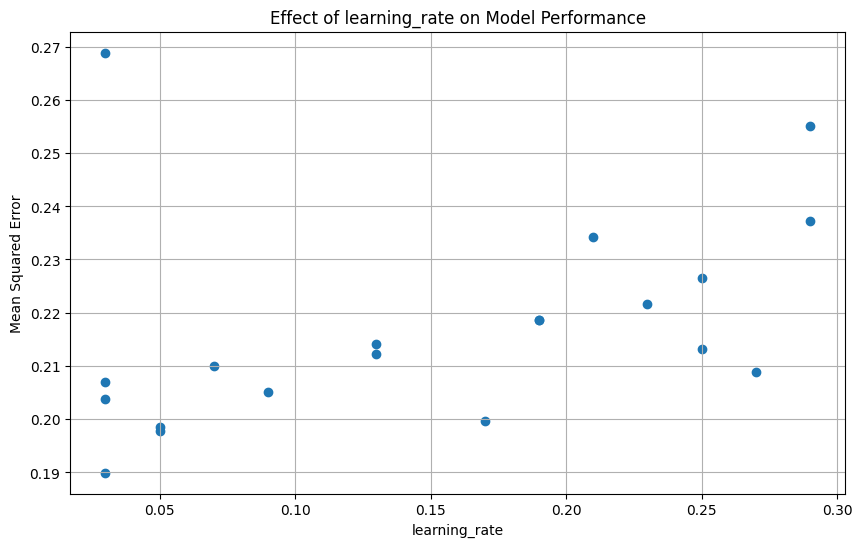

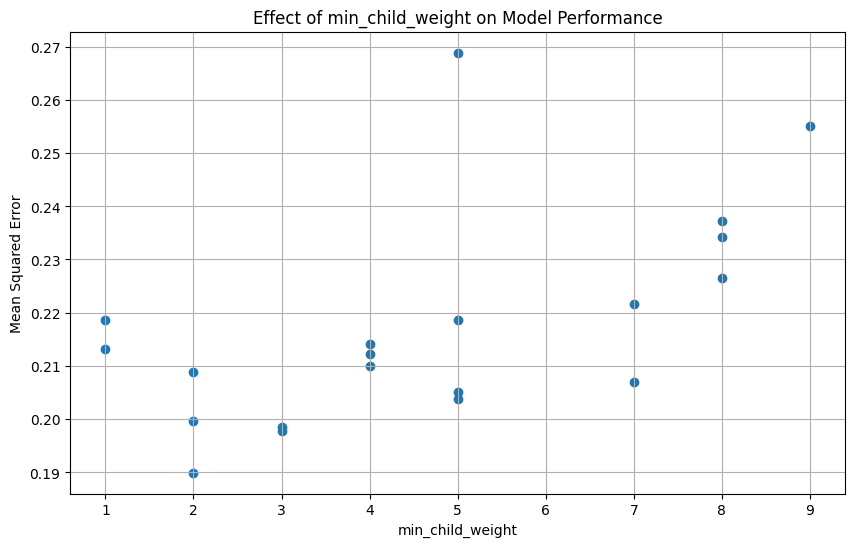

In [14]:
# Predict Happiness Score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Machine Learning: Predicting Happiness Score
# Fine-Tuning with Random Search to Find Optimal Hyperparameter Ranges

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Define function to visualize the effect of hyperparameters on model performance
def visualize_hyperparameter(param_name, param_values, scores):
    """
    Visualize the effect of a hyperparameter on model performance.
    
    Parameters:
        param_name (str): Name of the hyperparameter.
        param_values (list): List of values for the hyperparameter.
        scores (list): List of mean squared error scores corresponding to each hyperparameter value.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(param_values, scores, marker='o')
    plt.title(f"Effect of {param_name} on Mean Squared Error")
    plt.xlabel(param_name)
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

# Prepare the data
X = df.drop(["Country", "happiness_score"], axis=1)
y = df["happiness_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define hyperparameter ranges
n_estimators = np.arange(100, 1000, 50)
max_depth = np.arange(3, 10, 1)
learning_rate = np.arange(0.01, 0.3, 0.02)
min_child_weight = np.arange(1, 10, 1)
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_child_weight": min_child_weight
}

# Initialize and run Randomized Search CV
model = RandomizedSearchCV(estimator= XGBRegressor(),
                           param_distributions=param_grid,
                           n_iter=20,
                           scoring="neg_mean_squared_error",
                           n_jobs=4,
                           cv=10,
                           refit=True)
model.fit(X_train, y_train)

# Extract the best hyperparameters and corresponding scores
best_n_estimators = [model.cv_results_['params'][i]['n_estimators'] for i in range(model.n_iter)]
best_scores = model.cv_results_['mean_test_score']

# Visualize the effect of 'n_estimators' on model performance
visualize_hyperparameter("n_estimators", best_n_estimators, -best_scores)

# Visualize the effect of 'max_depth' on model performance
best_max_depth = [model.cv_results_['params'][i]['max_depth'] for i in range(model.n_iter)]
visualize_hyperparameter("max_depth", best_max_depth, -best_scores)

# Visualize the effect of 'learning_rate' on model performance
best_learning_rate = [model.cv_results_['params'][i]['learning_rate'] for i in range(model.n_iter)]
visualize_hyperparameter("learning_rate", best_learning_rate, -best_scores)

# Visualize the effect of 'min_child_weight' on model performance
best_min_child = [model.cv_results_['params'][i]['min_child_weight'] for i in range(model.n_iter)]
visualize_hyperparameter("min_child_weight", best_min_child, -best_scores)


After running the model multiple times and analyzing the visualizations, we have identified promising ranges for the hyperparameters. For n_estimators, values between 100 and 250 with increments of 50 appear to be promising. Regarding max_depth, values between 3 and 4 show potential. For learning_rate, values between 0.01 and 0.09 with increments of 0.01 seem promising. Finally, for min_child_weight, values between 1 and 2 exhibit potential.

With these promising ranges identified, we can now conduct a grid search to fine-tune the XGBRegressor model further. This grid search will explore various combinations of hyperparameters within these specified ranges to find the optimal configuration that maximizes the model's predictive performance.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(["Country", "happiness_score"], axis=1)
y = df["happiness_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define hyperparameter ranges
n_estimators = np.arange(100, 300, 50)
max_depth = np.arange(3, 5, 1)
learning_rate = np.arange(0.01, 0.1, 0.01)
min_child_weight = np.arange(1, 3, 1)
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_child_weight": min_child_weight
}

# Perform Grid Search Cross Validation
model = GridSearchCV(estimator=XGBRegressor(),
                     param_grid=param_grid,
                     scoring="neg_mean_squared_error",
                     n_jobs=4,
                     cv=10,
                     refit=True,
                     return_train_score=True)
model.fit(X_train, y_train)

# Display the results of Grid Search
cv_results_df = pd.DataFrame(model.cv_results_)
print(cv_results_df)

# Print the best estimator found by Grid Search
print(model.best_estimator_)

     mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0         0.094255      0.012168  ...         -3.926790         0.031892
1         0.128763      0.003368  ...         -1.567224         0.012870
2         0.176560      0.013547  ...         -0.650737         0.005307
3         0.227462      0.014599  ...         -0.287436         0.003008
4         0.096293      0.016334  ...         -3.927297         0.032112
..             ...           ...  ...               ...              ...
139       0.232613      0.012636  ...         -0.000149         0.000057
140       0.091201      0.002929  ...         -0.006852         0.001090
141       0.140059      0.007228  ...         -0.002184         0.000265
142       0.199708      0.023464  ...         -0.000764         0.000129
143       0.215973      0.005607  ...         -0.000281         0.000072

[144 rows x 34 columns]
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, co

After conducting the grid search, the best estimator for the XGBRegressor model was found to have the following tuned hyperparameters:

- n_estimators: 100
- max_depth: 4
- learning_rate: 0.05
- min_child_weight: 2

These hyperparameters were selected based on their performance in optimizing the model's predictive accuracy. They represent the combination of settings that resulted in the lowest mean squared error during the grid search process. Now, we can proceed to evaluate the model's performance using these optimized hyperparameters.

Mean Squared Error (MSE): 0.2187234177268178
Root Mean Squared Error (RMSE): 0.4676787548379954
Mean Absolute Error (MAE): 0.3458705268383027
R-squared (R2): 0.8029441861958986


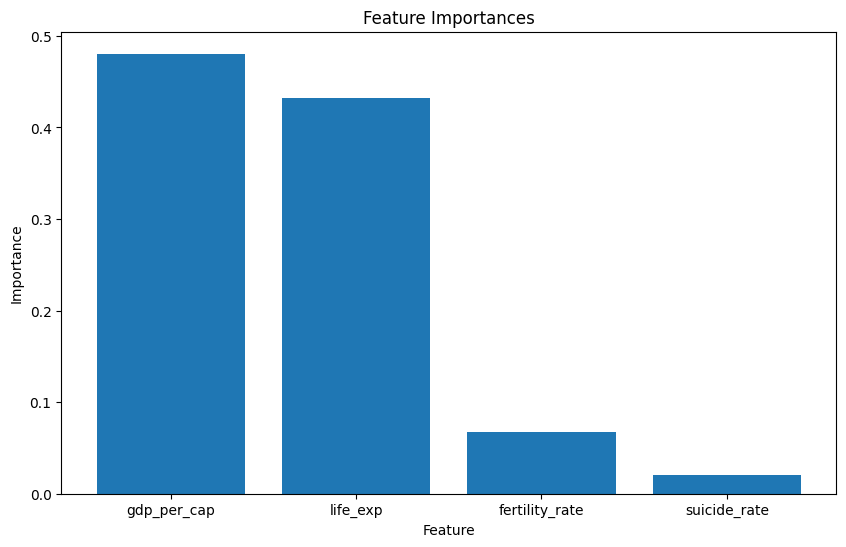

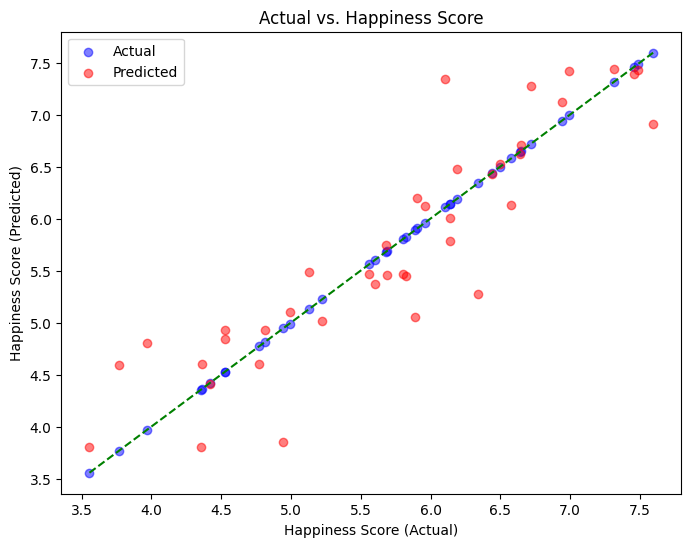

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(["Country", "happiness_score"], axis=1)
y = df["happiness_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Initialize and train the XGBoost regressor model
model = XGBRegressor(max_depth=4, n_estimators=100, learning_rate=0.05, min_child_weight=2)
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, color='b', label='Actual')  # Actual values
plt.scatter(y_test, pred, alpha=0.5, color='r', label='Predicted')  # Predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='--')  # Line of equality
plt.title("Actual vs. Happiness Score")
plt.xlabel("Happiness Score (Actual)")
plt.ylabel("Happiness Score (Predicted)")
plt.legend()
plt.show()



In this particular case, the obtained metrics suggest that the model's performance in predicting happiness scores is quite good.

The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are relatively low, indicating that, on average, the model's predictions are close to the actual happiness scores. This suggests that the model has good accuracy in predicting happiness levels.

The Mean Absolute Error (MAE) is also low, indicating that, on average, the absolute differences between the predicted and actual happiness scores are small. This implies that the model's predictions are relatively accurate.

The R-squared (R2) value is relatively high, indicating that a significant proportion of the variance in the happiness scores is explained by the independent variables used in the model. This suggests that the model provides a good fit to the data and captures the underlying relationships between the predictors and happiness levels effectively.

Overall, based on these metrics, the model appears to perform well in predicting happiness scores for the given dataset.

Additionally, from the visualization of feature importances, it is evident that the most important features for predicting happiness scores are GDP per capita and life expectancy. This suggests that these two variables have the strongest influence on determining the happiness levels of countries in the dataset.







### ----------------------------------------------------------------------------------------------------------------------------------------------------------

For the third machine learning model, focusing on predicting GDP per capita, we employ a GradientBoostingRegressor. This algorithm sequentially constructs a series of decision trees, leveraging their collective predictions to refine accuracy iteratively. Given the complexity of economic data and the non-linear relationships inherent in GDP per capita, GradientBoostingRegressor is an ideal choice for this task.

Following the established methodology, we begin by segregating features from the target variable, with the natural logarithm of GDP per capita serving as the target. Subsequently, we define a range of hyperparameters encompassing essential factors such as the number of estimators, maximum depth, learning rate, minimum samples split, minimum samples leaf, and maximum features for the GradientBoostingRegressor model.

With Randomized Search CV, we embark on a quest to identify the most optimal hyperparameters. Through iterative evaluation of different parameter combinations, we seek those yielding superior performance in predicting the logarithm of GDP per capita. Visualizations further illuminate the impact of each hyperparameter on model efficacy, facilitating the selection of promising ranges for fine-tuning.

Once the optimal hyperparameters are pinpointed, the model undergoes training using these configurations. Its performance is subsequently assessed using key metrics, including mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) score. 

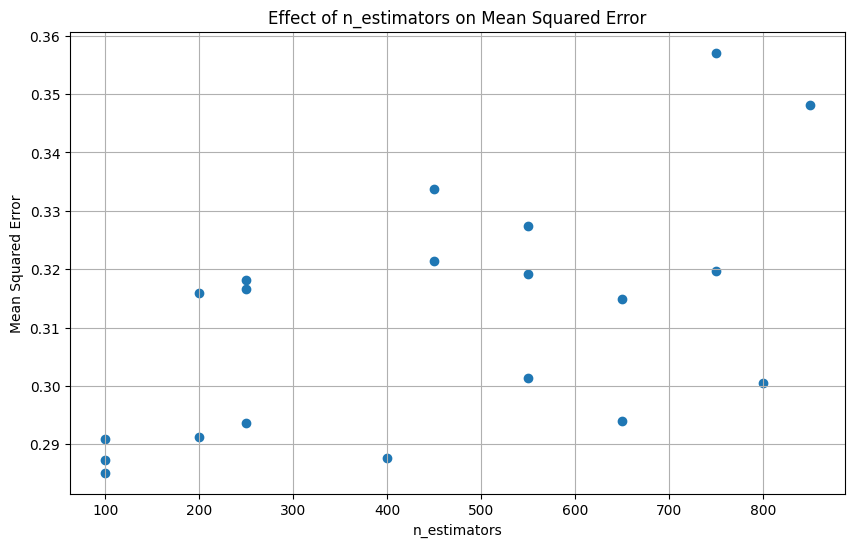

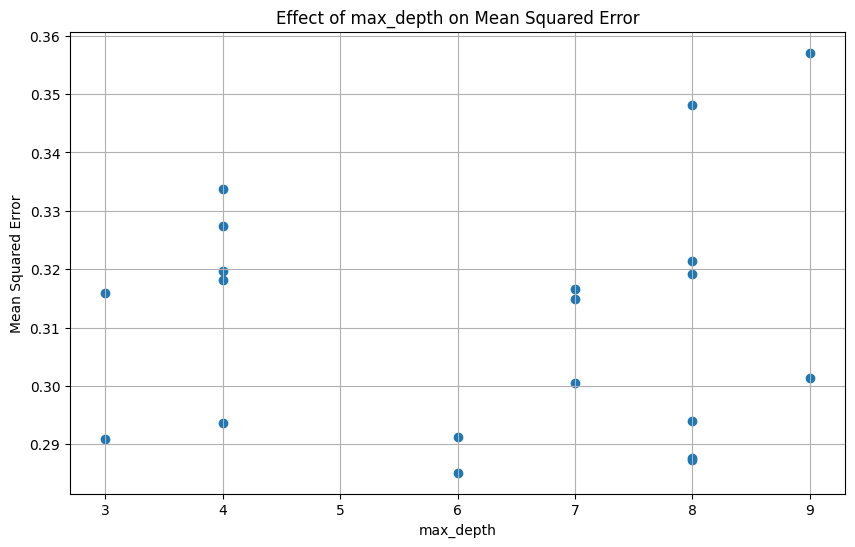

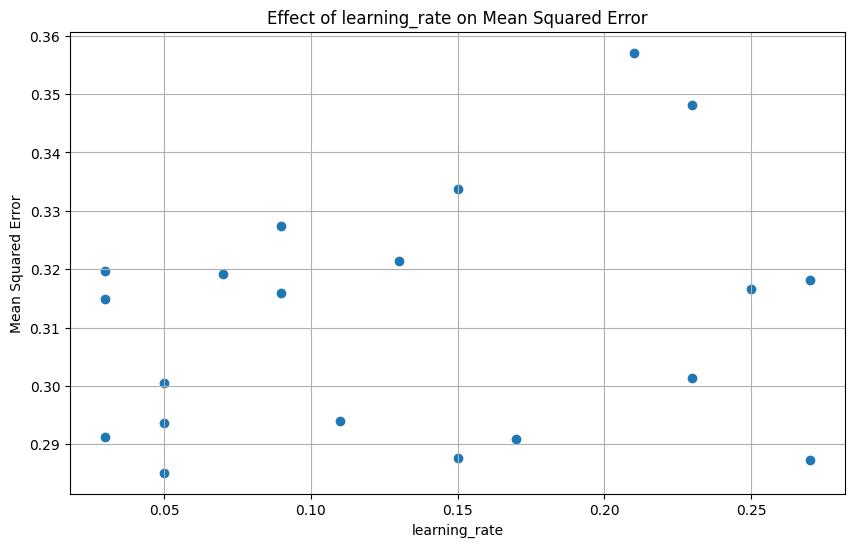

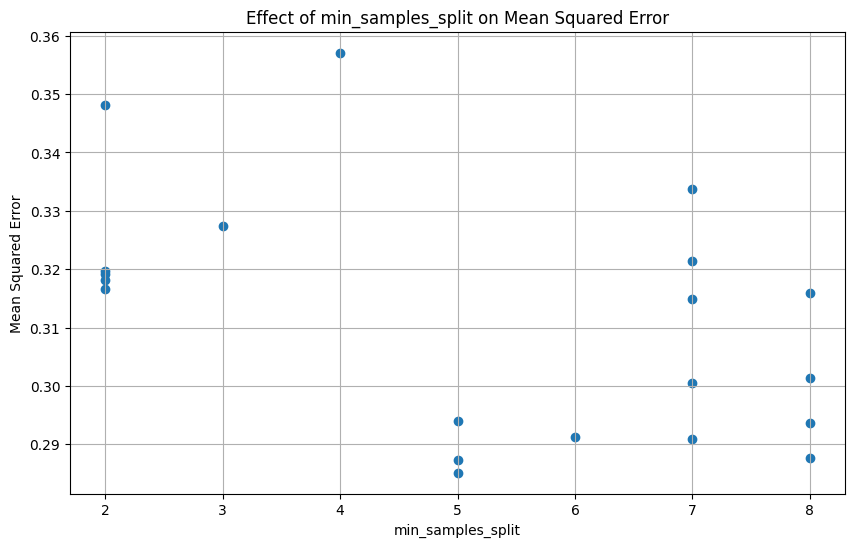

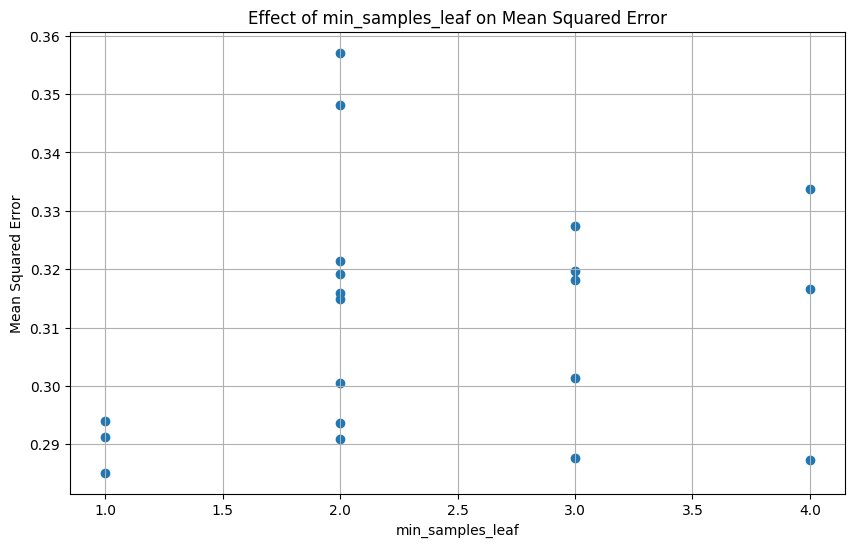

In [2]:
# Predict GDP Per Capita
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)
df["gdp_per_cap_log"] = np.log(df["gdp_per_cap"])
df = df.drop("gdp_per_cap", axis=1)
# Machine Learning: Predicting GDP per Capita
# Fine-Tuning with Random Search to Find Optimal Hyperparameter Ranges

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Define function to visualize the effect of hyperparameters on model performance
def visualize_hyperparameter(param_name, param_values, scores):
    """
    Visualize the effect of a hyperparameter on model performance.
    
    Parameters:
        param_name (str): Name of the hyperparameter.
        param_values (list): List of values for the hyperparameter.
        scores (list): List of mean squared error scores corresponding to each hyperparameter value.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(param_values, scores, marker='o')
    plt.title(f"Effect of {param_name} on Mean Squared Error")
    plt.xlabel(param_name)
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

# Prepare the data
X = df.drop(["Country", "gdp_per_cap_log"], axis=1)
y = df["gdp_per_cap_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define hyperparameter ranges
n_estimators = np.arange(100, 1000, 50)  
learning_rate = np.arange(0.01, 0.3, 0.02)  
max_depth = np.arange(3, 10, 1)  
min_samples_split = np.arange(2, 10, 1)  
min_samples_leaf = np.arange(1, 5, 1)  
max_features = ['auto', 'sqrt', 'log2', None]
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_samples_split": min_samples_split,
   "min_samples_leaf": min_samples_leaf,
   "max_features": max_features
}


# Initialize and run Randomized Search CV
model = RandomizedSearchCV(estimator= GradientBoostingRegressor(),
                           param_distributions=param_grid,
                           n_iter=20,
                           scoring="neg_mean_squared_error",
                           n_jobs=4,
                           cv=10,
                           refit=True)
model.fit(X_train, y_train)

# Extract the best hyperparameters and corresponding scores
best_n_estimators = [model.cv_results_['params'][i]['n_estimators'] for i in range(model.n_iter)]
best_scores = model.cv_results_['mean_test_score']

# Visualize the effect of 'n_estimators' on model performance
visualize_hyperparameter("n_estimators", best_n_estimators, -best_scores)

# Visualize the effect of 'max_depth' on model performance
best_max_depth = [model.cv_results_['params'][i]['max_depth'] for i in range(model.n_iter)]
visualize_hyperparameter("max_depth", best_max_depth, -best_scores)

# Visualize the effect of 'learning_rate' on model performance
best_learning_rate = [model.cv_results_['params'][i]['learning_rate'] for i in range(model.n_iter)]
visualize_hyperparameter("learning_rate", best_learning_rate, -best_scores)

# Visualize the effect of 'min_samples_split' on model performance
best_min_samples_split = [model.cv_results_['params'][i]['min_samples_split'] for i in range(model.n_iter)]
visualize_hyperparameter("min_samples_split", best_min_samples_split, -best_scores)

# Visualize the effect of 'min_samples_leaf' on model performance
best_min_samples_leaf = [model.cv_results_['params'][i]['min_samples_leaf'] for i in range(model.n_iter)]
visualize_hyperparameter("min_samples_leaf", best_min_samples_leaf, -best_scores)


After conducting the randomized search, we discern a promising range of hyperparameters that merit further exploration through grid search. This range encompasses the following values:

- n_estimators: Varying from 100 to 200.
- learning_rate: Ranging from 0.01 to 0.06.
- max_depth: Spanning from 6 to 8.
- min_samples_split: Ranging from 5 to 6.
- min_samples_leaf: Varied between 1 and 2.

This predefined range serves as a guide for conducting grid search, allowing for a more focused exploration of hyperparameters within intervals where the model is likely to exhibit optimal performance. By systematically evaluating combinations of hyperparameters within these specified ranges, we aim to identify the configuration that yields the most accurate predictions of GDP per capita.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)
df["gdp_per_cap_log"] = np.log(df["gdp_per_cap"])
df = df.drop("gdp_per_cap", axis=1)
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(["Country", "gdp_per_cap_log"], axis=1)
y = df["gdp_per_cap_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Define hyperparameter ranges
n_estimators = np.arange(100, 200, 50)  
learning_rate = np.arange(0.01, 0.06, 0.01)  
max_depth = np.arange(6, 8, 1)  
min_samples_split = np.arange(5, 6, 1)  
min_samples_leaf = np.arange(1, 2, 1)  
max_features = ['auto', 'sqrt', 'log2', None]
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# Perform Grid Search Cross Validation
model = GridSearchCV(estimator=GradientBoostingRegressor(),
                     param_grid=param_grid,
                     scoring="neg_mean_squared_error",
                     n_jobs=4,
                     cv=10,
                     refit=True,
                     return_train_score=True)
model.fit(X_train, y_train)

# Display the results of Grid Search
cv_results_df = pd.DataFrame(model.cv_results_)
print(cv_results_df)

# Print the best estimator found by Grid Search
print(model.best_estimator_)

    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        0.041508      0.002032  ...         -0.258359         0.007956
1        0.059551      0.001604  ...         -0.104344         0.003499
2        0.035942      0.000313  ...         -0.260641         0.009239
3        0.053084      0.000828  ...         -0.105762         0.004201
4        0.035617      0.000238  ...         -0.260768         0.009650
..            ...           ...  ...               ...              ...
75       0.055196      0.001945  ...         -0.000027         0.000008
76       0.037968      0.001407  ...         -0.000370         0.000046
77       0.054499      0.001155  ...         -0.000026         0.000007
78       0.040258      0.000437  ...         -0.000257         0.000045
79       0.060861      0.002177  ...         -0.000011         0.000004

[80 rows x 36 columns]
GradientBoostingRegressor(learning_rate=0.04, max_depth=6, max_features='sqrt',
                          min_sa

The outcome of the grid search reveals the optimal set of hyperparameters for the GradientBoostingRegressor model:

- Learning Rate: 0.04
- Max Depth: 6
- Max Features: 'sqrt'
- Min Samples Split: 5
- Number of Estimators: 150

These parameters represent the configuration that the model has determined to be most effective for predicting GDP per capita.








Mean Squared Error (MSE): 0.37733041121743094
Root Mean Squared Error (RMSE): 0.6142722614748536
Mean Absolute Error (MAE): 0.47318496158003115
R-squared (R2): 0.8143353307569314


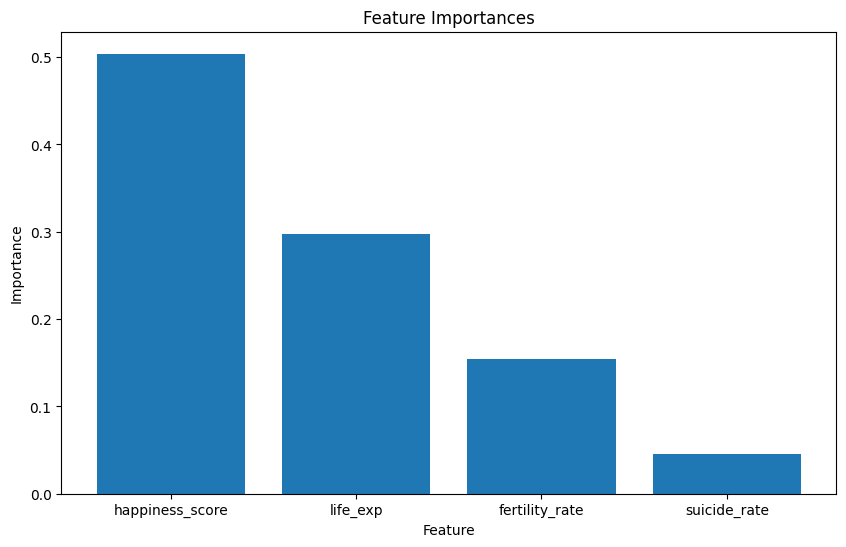

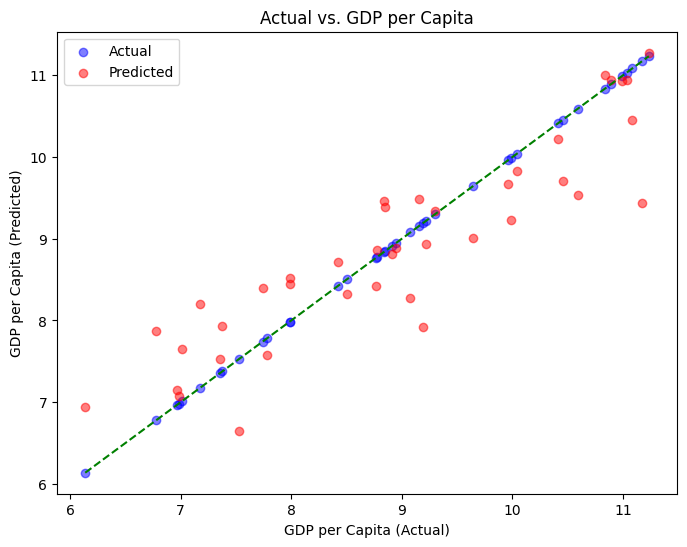

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

df_1 = pd.read_csv("Life expectancy.csv")
df_2 = pd.read_csv("Suicide Rate.csv")
df = pd.merge(df_1, df_2, on="Country", how="inner")
df["life_exp_men"] = df["Life Expectancy (years) - Men"]
df["life_exp_women"] = df["Life Expectancy (years) - Women"]
df["happiness_score"] = df["Happiness Score"]
df["fertility_rate"] = df["Fertility Rate (births per woman)"]
df["suicide_rate"] = df["Suicide rate"]
df["gdp_per_cap"] = df["GDP per capita"].str.replace(',', '').astype("float64")
df = df.drop(["Life Expectancy (years) - Men", "Life Expectancy (years) - Women",
              "Happiness Score", "Fertility Rate (births per woman)",
              "GDP per capita", "Suicide rate"], axis=1)

df["life_exp"] = (df["life_exp_men"] + df["life_exp_women"])/2
df = df.drop(["life_exp_men", "life_exp_women"], axis=1)
df["gdp_per_cap_log"] = np.log(df["gdp_per_cap"])
df = df.drop("gdp_per_cap", axis=1)
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(["Country", "gdp_per_cap_log"], axis=1)
y = df["gdp_per_cap_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1618)

# Initialize and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(learning_rate=0.03, max_depth=6, max_features='log2',
                          min_samples_split=3, n_estimators=150, min_samples_leaf=1)
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, color='b', label='Actual')  # Actual values
plt.scatter(y_test, pred, alpha=0.5, color='r', label='Predicted')  # Predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='--')  # Line of equality
plt.title("Actual vs. GDP per Capita")
plt.xlabel("GDP per Capita (Actual)")
plt.ylabel("GDP per Capita (Predicted)")
plt.legend()
plt.show()


In the context of this project, the evaluation metrics for the GradientBoostingRegressor model are quite promising. The Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) are all relatively low, indicating that the model's predictions are generally close to the actual values. Additionally, the R-squared (R2) value of 0.814 suggests that a significant portion of the variance in GDP per capita is explained by the features used in the model.

Therefore, based on these metrics, the GradientBoostingRegressor model appears to be performing well in predicting GDP per capita for the project's purposes.

Furthermore, the visualization of feature importances has highlighted that the most influential features for predicting GDP per capita are happiness score and life expectancy. This implies that these factors have a significant impact on the economic prosperity of a country.





